In [31]:
pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
import pyarrow.parquet as pq
import openpyxl

# ── Carga de datos ─────────────────────────────────────────────────────────
df = pd.read_parquet(
    "C://Users//diana.lara//Documents//GitHub//Prophet_banco_bienestar//Insumos//df_general.parquet",
    engine="fastparquet"
)

df_calendario = pd.read_csv(
    "C:\\Users\\diana.lara\\Documents\\GitHub\\Prophet_banco_bienestar\\env_neuro_prophet\\calendarios_bienestar.csv"
)

# ============================================================
# HOLIDAYS PARA PROPHET — Granular (programa_letra)
# ============================================================

 
# --- 1. Por grupo ---
holidays_grupo = (
    df_calendario[['fecha', 'grupo']]
    .drop_duplicates()
    .rename(columns={'fecha': 'ds', 'grupo': 'holiday'})
    .reset_index(drop=True)
)
 
print("holidays_grupo\n", holidays_grupo)
# --- 2. Por programa ---
holidays_programa = (
    df_calendario[['fecha', 'programa']]
    .drop_duplicates()
    .rename(columns={'fecha': 'ds', 'programa': 'holiday'})
    .reset_index(drop=True)
)
 
print("holidays_programa\n", holidays_programa)
# --- 3. Por programa + letra ---
holidays_prog_letra = (
    df_calendario
    .assign(holiday=df_calendario['programa'] + '_' + df_calendario['letra'])
    [['fecha', 'holiday']]
    .drop_duplicates()
    .rename(columns={'fecha': 'ds'})
    .reset_index(drop=True)
)

print("holidays_prog_letra\n", holidays_prog_letra)
 

holidays_grupo
              ds         holiday
0    2024-12-02           becas
1    2024-12-03           becas
2    2024-12-04           becas
3    2024-12-05           becas
4    2024-12-06           becas
..          ...             ...
402  2023-05-16  sembrando_vida
403  2023-05-17  sembrando_vida
404  2024-09-09  sembrando_vida
405  2024-11-12  sembrando_vida
406  2025-11-07  sembrando_vida

[407 rows x 2 columns]
holidays_programa
              ds         holiday
0    2024-12-02           becas
1    2024-12-03           becas
2    2024-12-04           becas
3    2024-12-05           becas
4    2024-12-06           becas
..          ...             ...
978  2023-05-16  sembrando_vida
979  2023-05-17  sembrando_vida
980  2024-09-09  sembrando_vida
981  2024-11-12  sembrando_vida
982  2025-11-07  sembrando_vida

[983 rows x 2 columns]
holidays_prog_letra
               ds               holiday
0     2024-12-02               becas_A
1     2024-12-03               becas_B
2     2024-

In [2]:
pip install neuralprophet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import neuralprophet
print(neuralprophet.__version__)

c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


0.9.0


Cajero JF000001: 571 observaciones desde 2024-07-01
Rango: 2024-07-01 00:00:00 → 2026-01-22 00:00:00

Holidays: granular
  Eventos únicos: 164
  Total registros: 1877


WARNING - (py.warnings._showwarnmsg) - C:\Users\diana.lara\AppData\Local\Temp\ipykernel_30596\1653791509.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cajero_eventos[holiday_name] = df_cajero_eventos['ds'].isin(fechas_holiday).astype(int)

WARNING - (py.warnings._showwarnmsg) - C:\Users\diana.lara\AppData\Local\Temp\ipykernel_30596\1653791509.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cajero_eventos[holiday_name] = df_cajero_eventos['ds'].isin(fechas_holiday).astype(int)

WARNING - (py.warnings._showwarnms


CONFIGURANDO MODELO NEURALPROPHET

Parámetros configurados:
  --- Tendencia ---
  n_changepoints:      6
  trend_reg:           5
  --- AR ---
  n_lags:              60
  ar_reg:              0.01
  --- Red Neuronal ---
  num_hidden_layers:   2
  d_hidden:            64
  --- Estacionalidad ---
  yearly_seasonality:  52
  seasonality_reg:     3
  seasonality_mode:    additive
  --- Entrenamiento ---
  epochs:              150
  batch_size:          32
  learning_rate:       0.005
  --- Datos ---
  Holidays únicos:     164

Agregando holidays como eventos...
  Eventos agregados: 164

Iniciando entrenamiento...


WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.825% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view i

Epoch 109:  73%|███████▎  | 109/150 [06:00<02:15,  0.30it/s]   
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\pytorch_lightning\utilities\_pytree.py:21: `isinstance(treespec, LeafSpec)` is deprecated, use `isinstance(treespec, TreeSpec) and treespec.is_leaf()` instead.



Training: |          | 0/? [01:15<?, ?it/s, v_num=69, train_loss=0.704, reg_loss=0.560, MAE=6.08e+4, RMSE=8.74e+4, Loss=0.702, RegLoss=0.557]  
Entrenamiento completado.


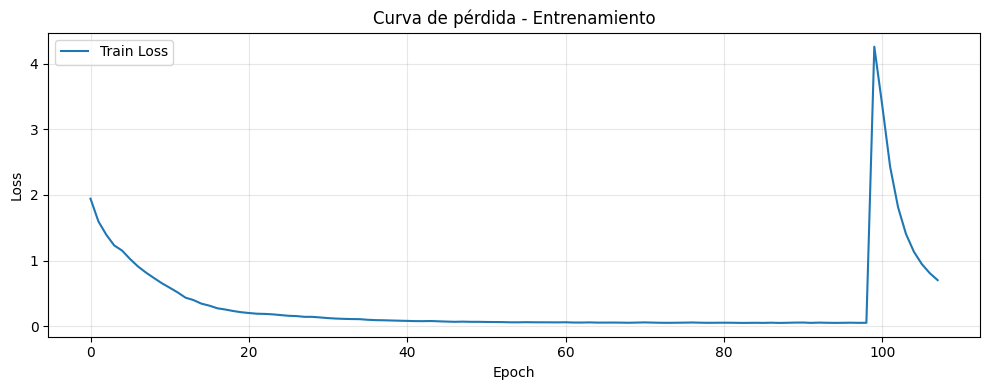

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.825% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view i

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



Columnas disponibles en forecast:
['ds', 'y', 'ar1', 'ar2', 'ar3', 'ar4', 'ar5', 'ar6', 'ar7', 'ar8', 'ar9', 'ar10', 'ar11', 'ar12', 'ar13', 'ar14', 'ar15', 'ar16', 'ar17', 'ar18', 'ar19', 'ar20', 'ar21', 'ar22', 'ar23', 'ar24', 'ar25', 'ar26', 'ar27', 'ar28', 'ar29', 'ar30', 'trend', 'season_yearly', 'season_weekly', 'events_additive', 'event_adultos_mayores_A', 'event_adultos_mayores_B', 'event_adultos_mayores_C', 'event_adultos_mayores_D', 'event_adultos_mayores_E', 'event_adultos_mayores_F', 'event_adultos_mayores_G', 'event_adultos_mayores_H', 'event_adultos_mayores_I', 'event_adultos_mayores_J', 'event_adultos_mayores_K', 'event_adultos_mayores_L', 'event_adultos_mayores_M', 'event_adultos_mayores_N', 'event_adultos_mayores_O', 'event_adultos_mayores_P', 'event_adultos_mayores_Q', 'event_adultos_mayores_R', 'event_adultos_mayores_S', 'event_adultos_mayores_T', 'event_adultos_mayores_U', 'event_adultos_mayores_V', 'event_adultos_mayores_W', 'event_adultos_mayores_X', 'event_adult

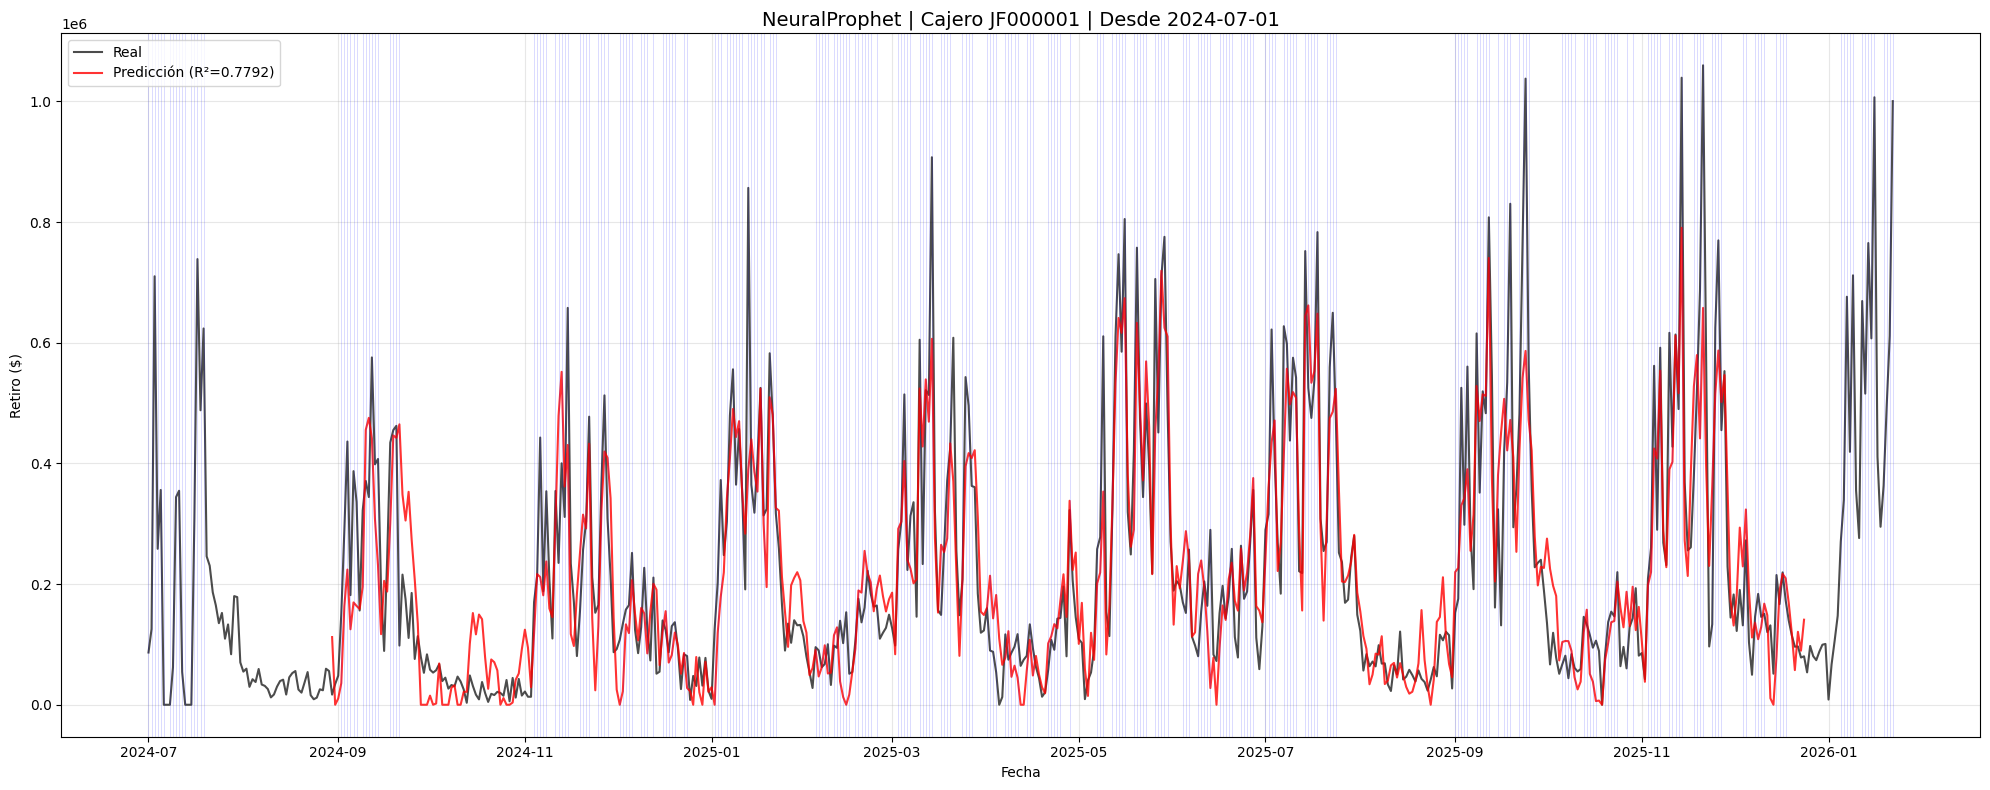


Filas con componentes completos: 511 de 571


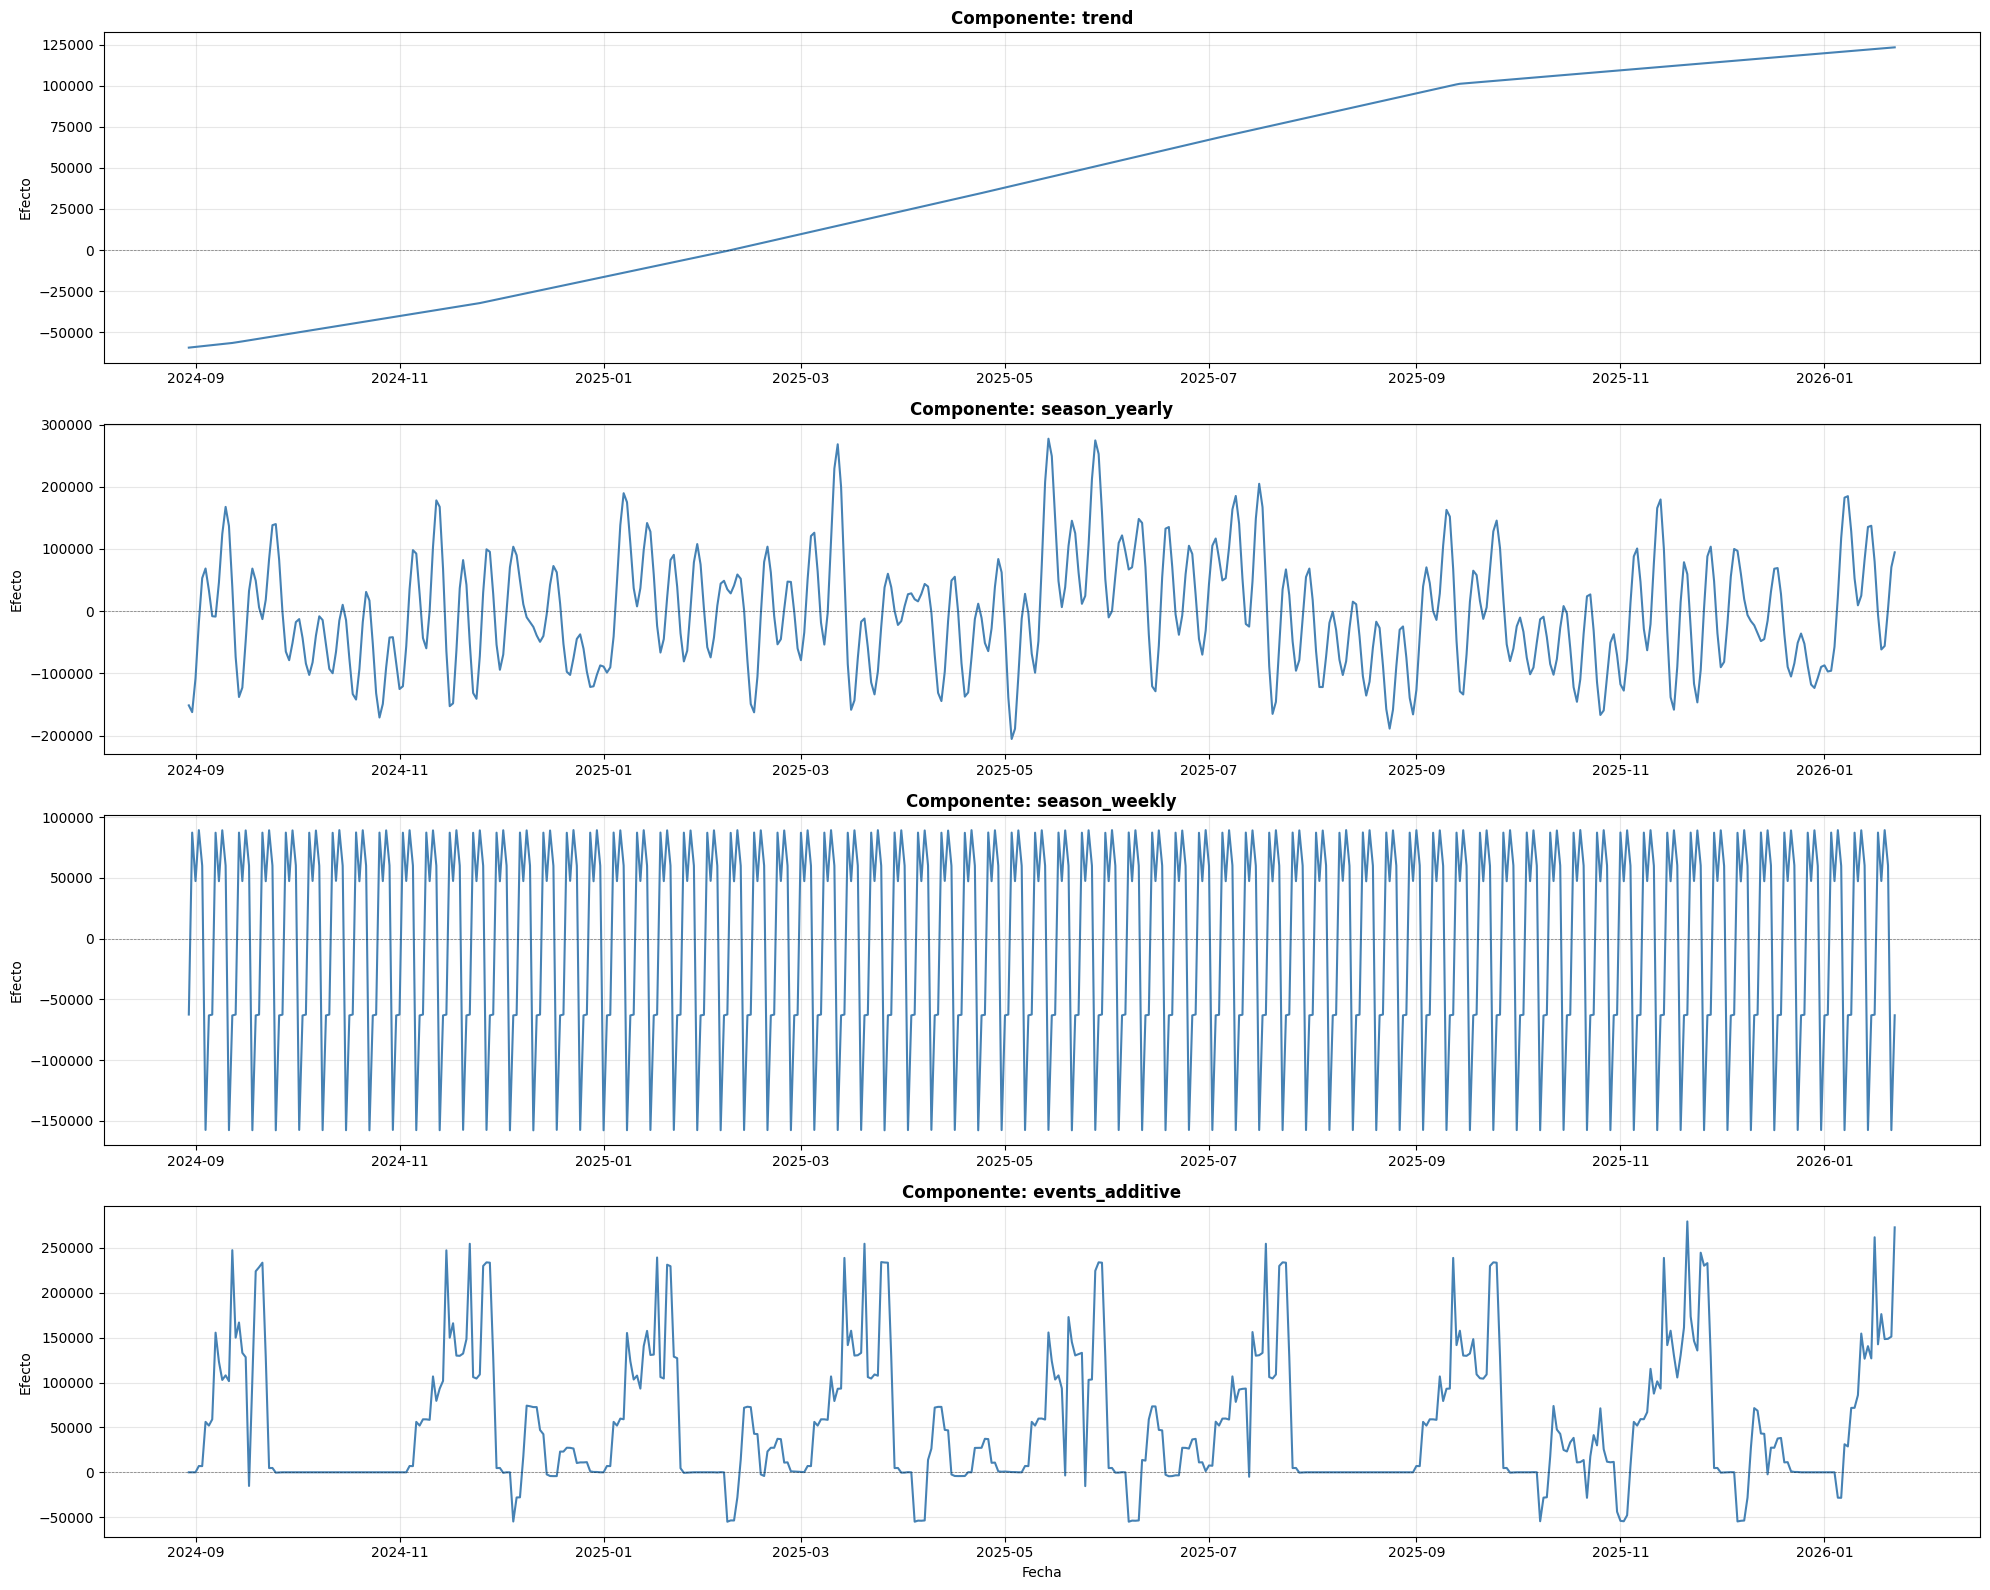

Componentes graficados exitosamente.

COMPARACIÓN:
  Prophet R²:        0.8175
  NeuralProphet R²:  0.7792
  ✗ NO MEJORÓ: -3.83 puntos porcentuales


In [46]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
from datetime import timedelta

# ============================================================
# 1. PREPARAR DATOS
# ============================================================
fecha_inicio = '2024-07-01'
cajero_test = 'JF000001'

df_cajero = df[(df['fecha'] >= fecha_inicio) & (df['cajero'] == cajero_test)][['fecha', 'retiro']].copy()
df_cajero.columns = ['ds', 'y']
df_cajero = df_cajero.sort_values('ds').reset_index(drop=True)

print(f"Cajero {cajero_test}: {len(df_cajero)} observaciones desde {fecha_inicio}")
print(f"Rango: {df_cajero['ds'].min()} → {df_cajero['ds'].max()}")

# ============================================================
# 2. CONFIGURAR HOLIDAYS (FECHAS DE DISPERSIÓN)
# ============================================================
holidays_type = 'granular'  # 'agregado' / 'granular'
holidays_usar = holidays_prog_letra if holidays_type == 'granular' else holidays_grupo

print(f"\nHolidays: {holidays_type}")
print(f"  Eventos únicos: {holidays_usar['holiday'].nunique()}")
print(f"  Total registros: {len(holidays_usar)}")

# Crear columnas binarias por evento
df_cajero_eventos = df_cajero.copy()
for holiday_name in holidays_usar['holiday'].unique():
    fechas_holiday = holidays_usar[holidays_usar['holiday'] == holiday_name]['ds'].values
    fechas_holiday=pd.to_datetime(fechas_holiday)
    df_cajero_eventos[holiday_name] = df_cajero_eventos['ds'].isin(fechas_holiday).astype(int)
    for i in range(1, 4):  # ventana: 3 días después
        df_cajero_eventos.loc[
            df_cajero_eventos['ds'].isin(fechas_holiday + timedelta(days=i)),
            holiday_name
        ] = 1

# ============================================================
# 3. CONFIGURAR MODELO NEURALPROPHET
# ============================================================
print("\n" + "="*80)
print("CONFIGURANDO MODELO NEURALPROPHET")
print("="*80)

modelo = NeuralProphet(
    # --- TENDENCIA ---
    growth='linear',              # 'linear' | 'discontinuous'
    n_changepoints=6,             # Puntos de cambio en tendencia
    changepoints_range=0.9,       # Rango donde se permiten changepoints (0-1)
    trend_reg=5,                  # Regularización tendencia: alto=suave, bajo=flexible

    # --- COMPONENTE AUTORREGRESIVO ---
    n_lags=60,                    # ⚠️ Bajado de 150 a 60 (tienes ~230 días de datos)
    ar_reg=0.01,                  # Regularización AR: bajo=usa mucho historial

   
    # --- ESTACIONALIDAD ---
    yearly_seasonality=52,        # Términos Fourier anuales
    weekly_seasonality=True,      # Patrón semanal
    daily_seasonality=False,      # Sin patrón intra-día (datos diarios)
    seasonality_mode='additive',  # 'additive' | 'multiplicative'
    seasonality_reg=3,            # Regularización estacionalidad

    # --- PREDICCIÓN ---
    n_forecasts=30,               # Horizonte de predicción (días)

    # --- ENTRENAMIENTO ---
    epochs=150,                   # Subido a 150 para dar más tiempo a la red
    batch_size=32,                # 16=preciso/lento, 32=balanceado, 64=rápido
    learning_rate=0.005,          # Bajado ligeramente para mayor estabilidad con la red

    # --- OTROS ---
    loss_func='Huber',            # 'MSE' | 'Huber' | 'MAE'
    normalize='standardize',      # 'off' | 'minmax' | 'standardize'
    impute_missing=True,
)

print(f"\nParámetros configurados:")
print(f"  --- Tendencia ---")
print(f"  n_changepoints:      6")
print(f"  trend_reg:           5")
print(f"  --- AR ---")
print(f"  n_lags:              60")
print(f"  ar_reg:              0.01")
print(f"  --- Red Neuronal ---")
print(f"  num_hidden_layers:   2")
print(f"  d_hidden:            64")
print(f"  --- Estacionalidad ---")
print(f"  yearly_seasonality:  52")
print(f"  seasonality_reg:     3")
print(f"  seasonality_mode:    additive")
print(f"  --- Entrenamiento ---")
print(f"  epochs:              150")
print(f"  batch_size:          32")
print(f"  learning_rate:       0.005")
print(f"  --- Datos ---")
print(f"  Holidays únicos:     {holidays_usar['holiday'].nunique()}")

# ============================================================
# 4. AGREGAR HOLIDAYS AL MODELO
# ============================================================
print("\nAgregando holidays como eventos...")
for holiday_name in holidays_usar['holiday'].unique():
    modelo = modelo.add_events(
        holiday_name,
        lower_window=0,
        upper_window=3,
        regularization=0.1
    )
print(f"  Eventos agregados: {holidays_usar['holiday'].nunique()}")

# ============================================================
# 5. ENTRENAR MODELO
# ============================================================
print("\nIniciando entrenamiento...")
metrics = modelo.fit(df_cajero_eventos, freq='D', early_stopping=True)
print("Entrenamiento completado.")

# Curva de pérdida
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(metrics['Loss'], label='Train Loss')
if 'Loss_val' in metrics.columns:
    ax.plot(metrics['Loss_val'], label='Val Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Curva de pérdida - Entrenamiento')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# 6. GENERAR PREDICCIONES
# ============================================================
forecast = modelo.predict(df_cajero_eventos)
print("\nColumnas disponibles en forecast:")
print([c for c in forecast.columns.tolist() if not c.startswith('yhat')])

merged = df_cajero.merge(forecast[['ds', 'yhat1']], on='ds').dropna(subset=['yhat1'])

# ============================================================
# 7. EVALUAR DESEMPEÑO
# ============================================================
print("\nAplicando corrección: predicciones negativas → 0")
negativos_antes = (merged['yhat1'] < 0).sum()
merged['yhat1'] = merged['yhat1'].clip(lower=0)
print(f"  Predicciones negativas corregidas: {negativos_antes}")

r2   = r2_score(merged['y'], merged['yhat1'])
mae  = mean_absolute_error(merged['y'], merged['yhat1'])
rmse = np.sqrt(((merged['yhat1'] - merged['y'])**2).mean())

print(f"\n{'='*80}")
print("RESULTADOS:")
print(f"  R²:   {r2:.4f}  → % varianza explicada")
print(f"  MAE:  ${mae:,.0f}  → Error promedio")
print(f"  RMSE: ${rmse:,.0f}  → Penaliza errores grandes")
print("="*80)

# ============================================================
# 8. GRAFICAR AJUSTE
# ============================================================
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(df_cajero['ds'], df_cajero['y'],
        label='Real', color='black', linewidth=1.5, alpha=0.7)
ax.plot(merged['ds'], merged['yhat1'],
        label=f'Predicción (R²={r2:.4f})', color='red', linewidth=1.5, alpha=0.8)

for fecha in pd.to_datetime(holidays_usar['ds'].unique()):
    if df_cajero['ds'].min() <= fecha <= df_cajero['ds'].max():
        ax.axvline(fecha, color='blue', alpha=0.2, linewidth=0.5)

ax.set_title(f'NeuralProphet | Cajero {cajero_test} | Desde {fecha_inicio}', fontsize=14)
ax.set_xlabel('Fecha')
ax.set_ylabel('Retiro ($)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# 9. GRAFICAR COMPONENTES
# ============================================================
# Verificar nombres reales de columnas antes de graficar
componentes_candidatos = ['trend', 'season_yearly', 'season_weekly', 'events_additive',
                          'seasonality_yearly', 'seasonality_weekly']  # nombres alternativos por versión
componentes_a_graficar = [c for c in componentes_candidatos if c in forecast.columns]

if holidays_type == 'agregado':
    extras = ['event_adultos_mayores', 'event_discapacidad', 'event_madres_trabajadoras']
    componentes_a_graficar += [c for c in extras if c in forecast.columns]

forecast_limpio = forecast.dropna(subset=componentes_a_graficar)
print(f"\nFilas con componentes completos: {len(forecast_limpio)} de {len(forecast)}")

if len(forecast_limpio) > 0:
    fig, axes = plt.subplots(len(componentes_a_graficar), 1,
                             figsize=(20, 4 * len(componentes_a_graficar)))
    if len(componentes_a_graficar) == 1:
        axes = [axes]

    for idx, componente in enumerate(componentes_a_graficar):
        axes[idx].plot(forecast_limpio['ds'], forecast_limpio[componente],
                       linewidth=1.5, color='steelblue')
        axes[idx].set_title(f'Componente: {componente}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel('Efecto')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].axhline(0, color='black', linestyle='--', linewidth=0.5, alpha=0.5)

    axes[-1].set_xlabel('Fecha')
    plt.tight_layout()
    plt.show()
    print("Componentes graficados exitosamente.")
else:
    print("⚠️ No hay suficientes datos sin NaN para graficar componentes.")
    print("Puede pasar si n_lags es muy grande vs el tamaño del dataset.")

# ============================================================
# 10. COMPARACIÓN PROPHET vs NEURALPROPHET
# ============================================================
print("\n" + "="*80)
print("COMPARACIÓN:")
print(f"  Prophet R²:        0.8175")
print(f"  NeuralProphet R²:  {r2:.4f}")
if r2 > 0.8175:
    print(f"  ✓ MEJORA: +{(r2 - 0.8175)*100:.2f} puntos porcentuales")
else:
    print(f"  ✗ NO MEJORÓ: {(r2 - 0.8175)*100:.2f} puntos porcentuales")
print("="*80)

In [5]:
df_cajero

ds          y
0   2024-07-01    86600.0
1   2024-07-02   125500.0
2   2024-07-03   710200.0
3   2024-07-04   258500.0
4   2024-07-05   356000.0
..         ...        ...
566 2026-01-18   295000.0
567 2026-01-19   363100.0
568 2026-01-20   493900.0
569 2026-01-21   611600.0
570 2026-01-22  1000500.0

[571 rows x 2 columns]

Cajero JF000001: 571 observaciones desde 2024-07-01
Rango: 2024-07-01 00:00:00 → 2026-01-22 00:00:00

Holidays: granular


INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  if df.groupby("ID").apply(lambda x: x.duplicated("ds").any()).any():



  Eventos únicos: 81
  Total registros: 1110

CONFIGURANDO MODELO NEURALPROPHET - TRADUCCIÓN DE PROPHET ÓPTIMO

Parámetros configurados:
  n_changepoints:      6
  trend_reg:           5
  n_lags (AR):         150 ← NUEVO: memoria de 150 días
  ar_reg:              0.01
  yearly_seasonality:  52
  seasonality_reg:     3
  seasonality_mode:    additive
  n_forecasts:         30
  epochs:              100
  learning_rate:       0.01
  batch_size:          32
  Holidays únicos:     81

Agregando holidays como eventos...
  Eventos agregados: 81

Iniciando entrenamiento...


WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.825% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view i

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\pytorch_lightning\utilities\_pytree.py:21: `isinstance(treespec, LeafSpec)` is deprecated, use `isinstance(treespec, TreeSpec) and treespec.is_leaf()` instead.



Epoch 1:   1%|          | 1/100 [00:00<00:00, 500.33it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |          | 0/? [01:13<?, ?it/s, v_num=67, train_loss=0.140, reg_loss=0.0123, MAE=5.2e+4, RMSE=82562.0, Loss=0.139, RegLoss=0.0123] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.825% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view i


Entrenamiento completado.


WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\time_dataset.py:561: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  additive_events[key] = offset_feature

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\time_dataset.py:561: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  additive_events[key] = offset_feature

WARNING - (py.warnings._showwarnmsg) - c:\Users\di

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



Aplicando corrección: predicciones negativas → 0
  Predicciones negativas corregidas: 6

RESULTADOS:
  R² (coeficiente de determinación): 0.8890
     → % de varianza explicada por el modelo
  MAE (error absoluto medio):        $43,004
     → Error promedio en pesos
  RMSE (raíz del error cuadrático): $68,428
     → Penaliza más los errores grandes
Epoch 102:  68%|██████▊   | 102/150 [01:20<00:37,  1.27it/s]   


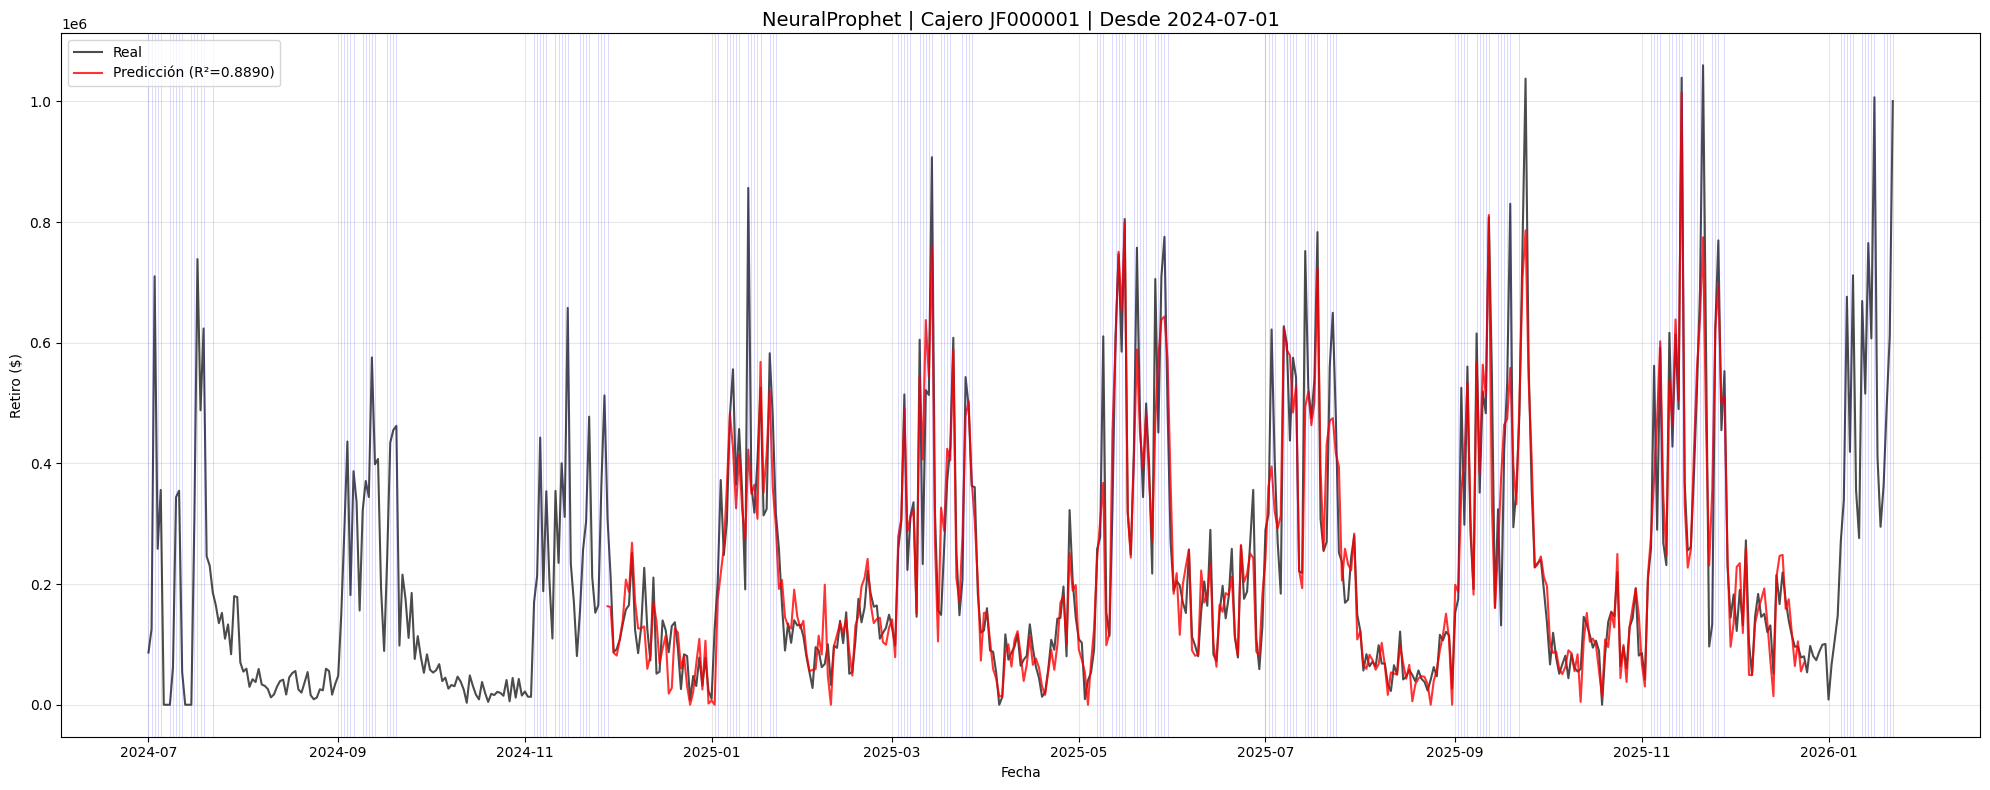


Filas con componentes completos: 421 de 571


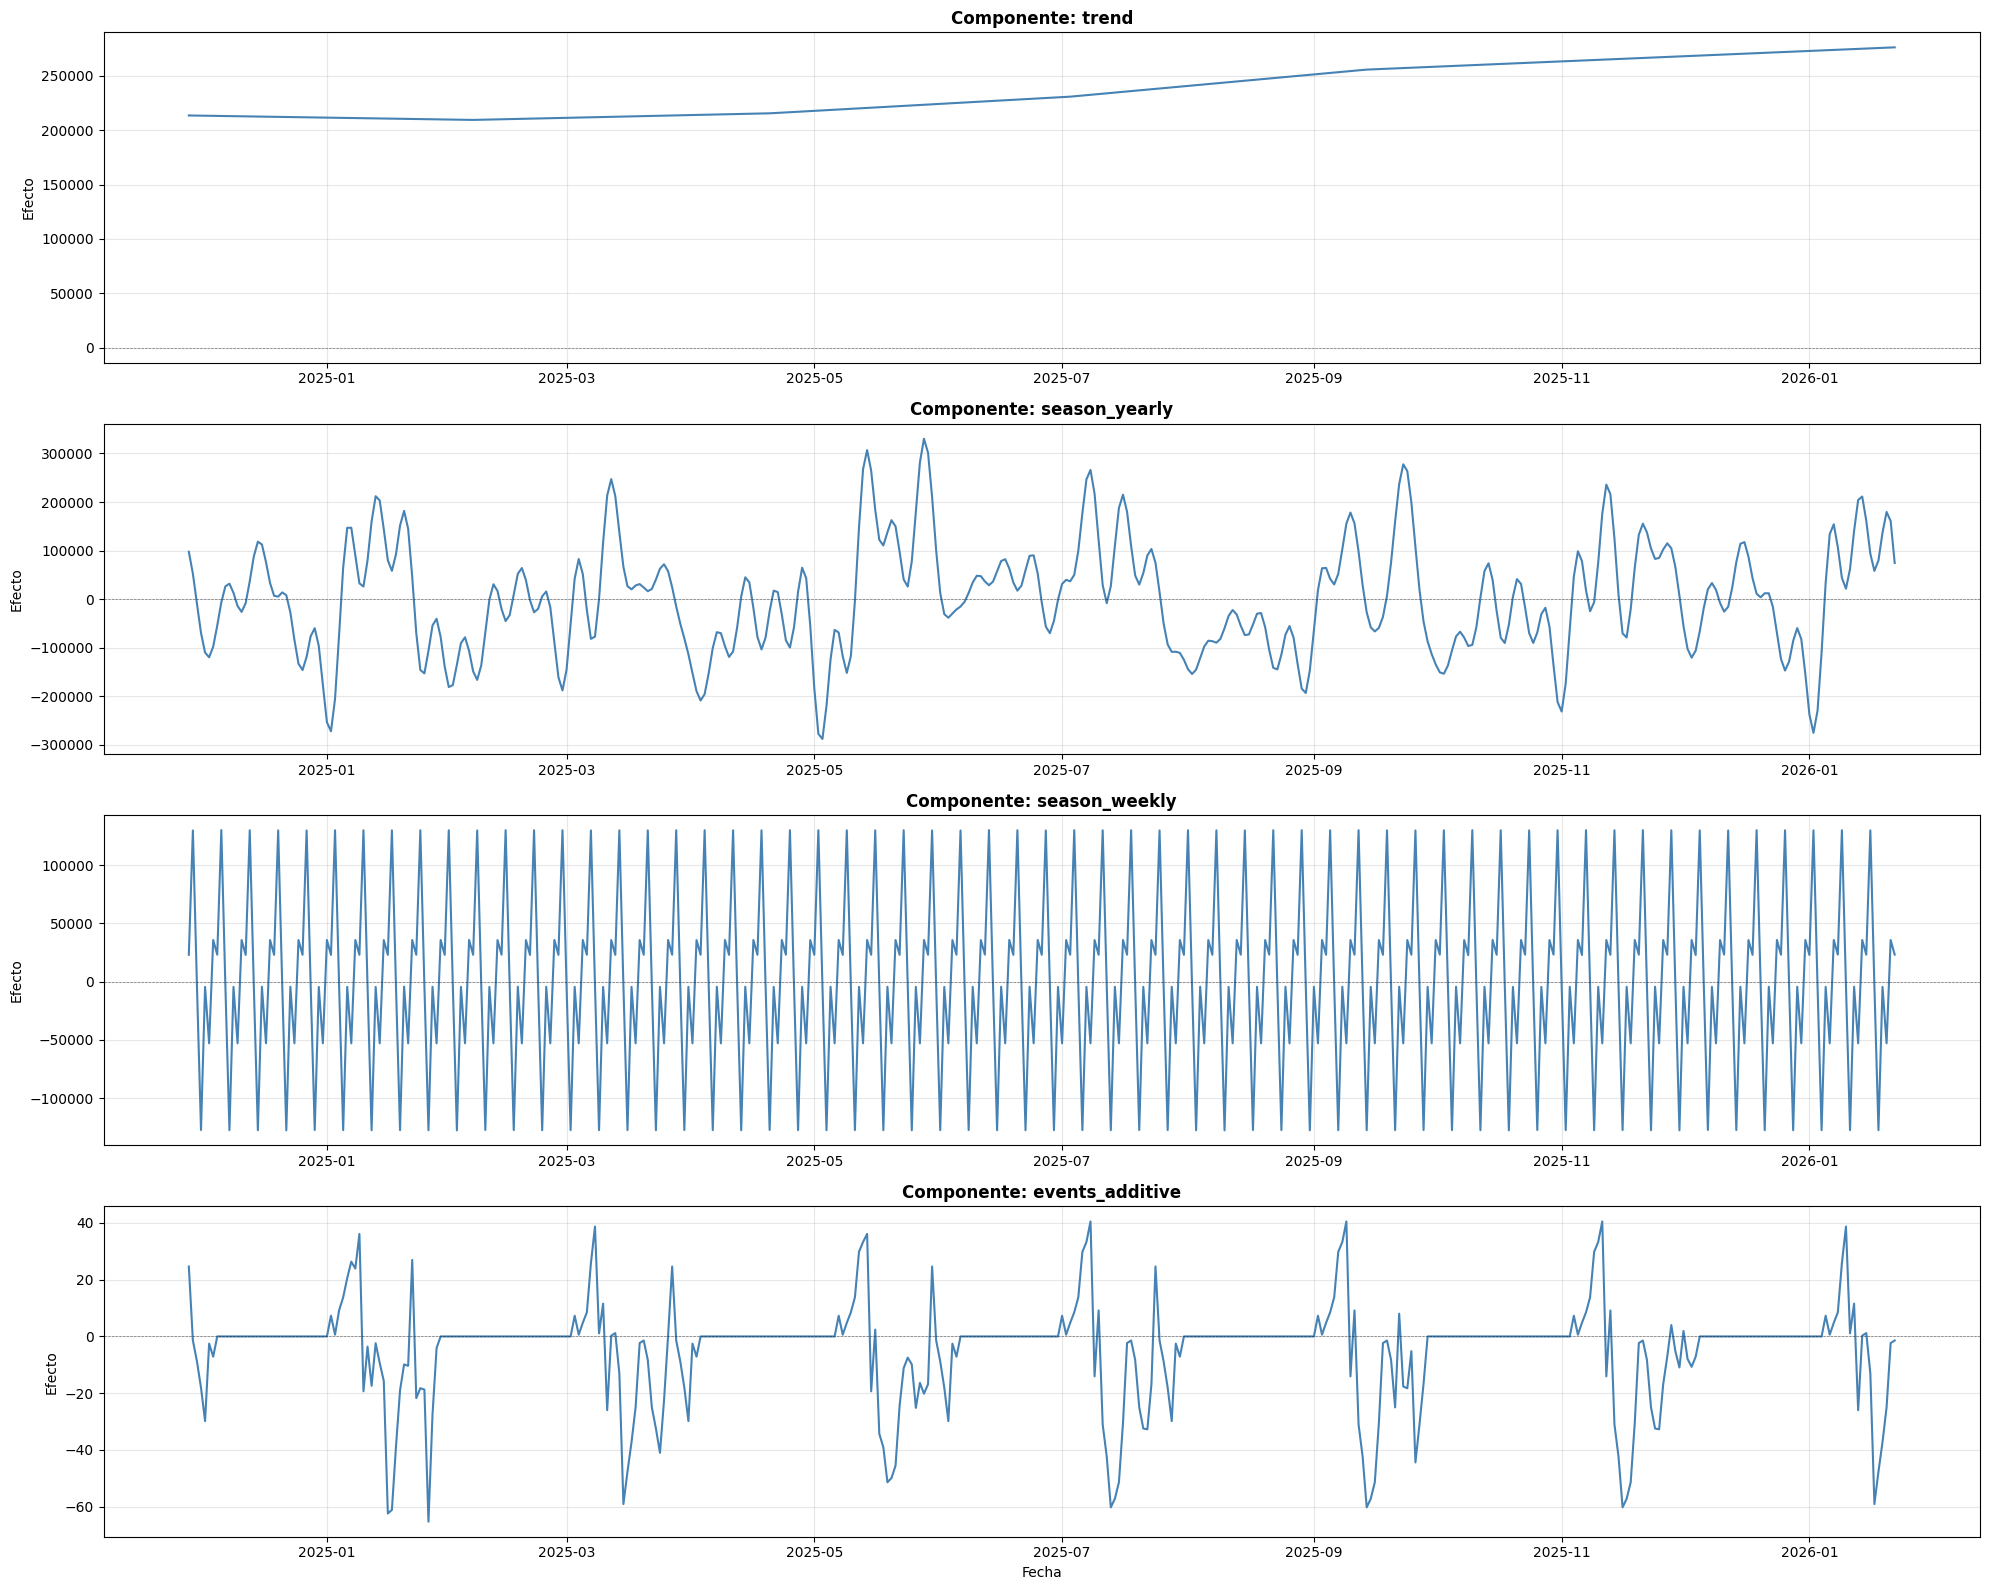

Componentes graficados exitosamente.

ANÁLISIS:
  Comparación Prophet vs NeuralProphet:
    Prophet R²:        0.8175
    NeuralProphet R²:  0.8890
    ✓ MEJORA: +7.15 puntos porcentuales
    → Componente AR y no linealidad ayudaron


In [6]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# ============================================================
# 1. PREPARAR DATOS
# ============================================================
# Definir periodo de análisis y cajero a modelar
fecha_inicio = '2024-07-01'  # Inicio post-periodo electoral
cajero_test = 'JF000001'

# Filtrar datos del cajero y periodo específico
df_cajero = df[(df['fecha'] >= fecha_inicio) & (df['cajero'] == cajero_test)][['fecha', 'retiro']].copy()
df_cajero.columns = ['ds', 'y']  # NeuralProphet también requiere columnas 'ds' e 'y'
df_cajero = df_cajero.sort_values('ds').reset_index(drop=True)

print(f"Cajero {cajero_test}: {len(df_cajero)} observaciones desde {fecha_inicio}")
print(f"Rango: {df_cajero['ds'].min()} → {df_cajero['ds'].max()}")

# ============================================================
# 2. CONFIGURAR HOLIDAYS (FECHAS DE DISPERSIÓN)
# ============================================================
# Elegir nivel de granularidad de holidays:
# - 'granular': 54 eventos (adultos_mayores_A, adultos_mayores_B, etc.)
# - 'agregado': 3 eventos (adultos_mayores, discapacidad, madres_trabajadoras)
holidays_type = 'granular' # agregado / granular
holidays_usar = holidays_df_granular if holidays_type == 'granular' else holidays_df_agregado

print(f"\nHolidays: {holidays_type}")
print(f"  Eventos únicos: {holidays_usar['holiday'].nunique()}")
print(f"  Total registros: {len(holidays_usar)}")

# NeuralProphet requiere holidays como columnas binarias en el dataframe
df_cajero_eventos = df_cajero.copy()
for holiday_name in holidays_usar['holiday'].unique():
    fechas_holiday = holidays_usar[holidays_usar['holiday'] == holiday_name]['ds'].values
    # Crear columna binaria: 1 si es día de ese holiday, 0 si no
    df_cajero_eventos[holiday_name] = df_cajero_eventos['ds'].isin(fechas_holiday).astype(int)
    # Aplicar ventana de efecto (lower_window=0, upper_window=3)
    for i in range(1, 4):  # 3 días después
        df_cajero_eventos.loc[
            df_cajero_eventos['ds'].isin(fechas_holiday + pd.Timedelta(days=i)), 
            holiday_name
        ] = 1

# ============================================================
# 3. CONFIGURAR MODELO NEURALPROPHET
# ============================================================
print("\n" + "="*80)
print("CONFIGURANDO MODELO NEURALPROPHET - TRADUCCIÓN DE PROPHET ÓPTIMO")
print("="*80)

modelo = NeuralProphet(
    # --- TENDENCIA ---
    growth='linear',  # Tendencia: 'linear'=crecimiento constante, 'discontinuous'=permite saltos/cambios abruptos
    n_changepoints=6,  # Número de puntos de cambio en la tendencia
    changepoints_range=0.9,  # Rango donde se permiten changepoints
    trend_reg=5,  # Regularización de tendencia: 0.1=flexible/cambios bruscos, 1.0=moderado, 10=muy suave (inverso a Prophet)
    
    # --- COMPONENTE AUTORREGRESIVO (NUEVO - NO EXISTE EN PROPHET) ---
    n_lags=150,  # Memoria: usa últimos N días de retiros como features
    ar_reg=0.01,  # Regularización del AR: 0.01=muy flexible/usa historial agresivamente, 0.1=moderado, 1.0=restrictivo
    
    # --- ESTACIONALIDAD ANUAL ---
    yearly_seasonality=52,  # Términos de Fourier para capturar ciclo anual
    seasonality_mode='additive',  # Modo: 'additive'=efectos constantes, 'multiplicative'=efectos escalan con nivel base
    seasonality_reg=3,  # Regularización de estacionalidad: 0.01=muy flexible, 0.1=moderado, 1.0=rígido (inverso a Prophet's seasonality_prior_scale)
    
    # --- ESTACIONALIDADES SEMANAL Y DIARIA ---
    weekly_seasonality=True,  # Activada: puede haber patrón semanal leve
    daily_seasonality=False,  # Desactivada: no hay patrón intra-día en datos diarios
    
    # --- PREDICCIÓN MULTI-HORIZONTE ---
    n_forecasts=30,  # Predecir 30 días hacia adelante simultáneamente
    
    # --- ENTRENAMIENTO ---
    epochs=100,  # Iteraciones de entrenamiento
    batch_size=32,  # Tamaño de batch para gradiente: 16=lento/preciso, 32=balanceado, 64=rápido/menos preciso
    learning_rate=0.01,  # Tasa de aprendizaje: 0.001=lento/estable, 0.01=balanceado, 0.1=rápido/inestable
    
    # --- OTROS ---
    loss_func='Huber',  # Función de pérdida: 'MSE'=sensible a outliers, 'Huber'=robusta a outliers, 'MAE'=muy robusta
    normalize='standardize',  # Normalización: 'off'=sin normalizar, 'minmax'=escala 0-1, 'standardize'=media 0 y std 1
    impute_missing=True  # Rellena gaps: True=interpola valores faltantes, False=mantiene NaN (puede causar errores)
)

print(f"\nParámetros configurados:")
print(f"  n_changepoints:      6")
print(f"  trend_reg:           5")
print(f"  n_lags (AR):         150 ← NUEVO: memoria de 150 días")
print(f"  ar_reg:              0.01")
print(f"  yearly_seasonality:  52")
print(f"  seasonality_reg:     3")
print(f"  seasonality_mode:    additive")
print(f"  n_forecasts:         30")
print(f"  epochs:              100")
print(f"  learning_rate:       0.01")
print(f"  batch_size:          32")
print(f"  Holidays únicos:     {holidays_usar['holiday'].nunique()}")

# ============================================================
# 4. AGREGAR HOLIDAYS (EVENTOS) AL MODELO
# ============================================================
print("\nAgregando holidays como eventos...")
for holiday_name in holidays_usar['holiday'].unique():
    modelo = modelo.add_events(
        holiday_name,
        lower_window=0,  # Efecto comienza el día del evento
        upper_window=3,  # Efecto dura 3 días después
        regularization=0.1  # Regularización de eventos
    )
print(f"  Eventos agregados: {len(holidays_usar['holiday'].unique())}")

# ============================================================
# 5. ENTRENAR MODELO
# ============================================================
print("\nIniciando entrenamiento...")
metrics = modelo.fit(df_cajero_eventos, freq='D')
print("Entrenamiento completado.")

# ============================================================
# 6. GENERAR PREDICCIONES
# ============================================================
forecast = modelo.predict(df_cajero_eventos)

# NeuralProphet con n_forecasts=30 genera yhat1, yhat2, ..., yhat30
# Usamos yhat1 (predicción a 1 día) para comparar con valores históricos
merged = df_cajero.merge(forecast[['ds', 'yhat1']], on='ds').dropna(subset=['yhat1'])

# ============================================================
# 7. EVALUAR DESEMPEÑO
# ============================================================
# Convertir predicciones negativas a cero
print("\nAplicando corrección: predicciones negativas → 0")
negativos_antes = (merged['yhat1'] < 0).sum()
merged['yhat1'] = merged['yhat1'].clip(lower=0)
print(f"  Predicciones negativas corregidas: {negativos_antes}")

# Calcular métricas
r2 = r2_score(merged['y'], merged['yhat1'])
mae = mean_absolute_error(merged['y'], merged['yhat1'])
rmse = np.sqrt(((merged['yhat1'] - merged['y'])**2).mean())

print(f"\n{'='*80}")
print("RESULTADOS:")
print(f"  R² (coeficiente de determinación): {r2:.4f}")
print(f"     → % de varianza explicada por el modelo")
print(f"  MAE (error absoluto medio):        ${mae:,.0f}")
print(f"     → Error promedio en pesos")
print(f"  RMSE (raíz del error cuadrático): ${rmse:,.0f}")
print(f"     → Penaliza más los errores grandes")
print("="*80)

# ============================================================
# 8. GRAFICAR AJUSTE
# ============================================================
fig, ax = plt.subplots(figsize=(20, 8))

# Serie real (negro)
ax.plot(df_cajero['ds'], df_cajero['y'], 
        label='Real', color='black', linewidth=1.5, alpha=0.7)

# Predicción (rojo)
ax.plot(merged['ds'], merged['yhat1'], 
        label=f'Predicción (R²={r2:.4f})', color='red', linewidth=1.5, alpha=0.8)

# Marcar fechas de dispersión (líneas verticales azules)
for fecha in holidays_usar['ds'].unique():
    if fecha >= df_cajero['ds'].min() and fecha <= df_cajero['ds'].max():
        ax.axvline(fecha, color='blue', alpha=0.2, linewidth=0.5)

ax.set_title(f'NeuralProphet | Cajero {cajero_test} | Desde {fecha_inicio}', 
             fontsize=14)
ax.set_xlabel('Fecha')
ax.set_ylabel('Retiro ($)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# 9. GRAFICAR COMPONENTES MANUALMENTE
# ============================================================

# Filtrar filas sin NaN en componentes
if holidays_type == 'granular':
    componentes_a_graficar = ['trend', 'season_yearly', 'season_weekly', 'events_additive']
else:
    componentes_a_graficar = ['trend', 'season_yearly', 'season_weekly', 'events_additive', 
                              'event_adultos_mayores', 'event_discapacidad', 'event_madres_trabajadoras']

forecast_limpio = forecast.dropna(subset=componentes_a_graficar)

print(f"\nFilas con componentes completos: {len(forecast_limpio)} de {len(forecast)}")

if len(forecast_limpio) > 0:
    fig, axes = plt.subplots(len(componentes_a_graficar), 1, figsize=(20, 4*len(componentes_a_graficar)))
    
    for idx, componente in enumerate(componentes_a_graficar):
        axes[idx].plot(forecast_limpio['ds'], forecast_limpio[componente], 
                      linewidth=1.5, color='steelblue')
        axes[idx].set_title(f'Componente: {componente}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel('Efecto')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].axhline(0, color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    
    axes[-1].set_xlabel('Fecha')
    plt.tight_layout()
    plt.show()
    print("Componentes graficados exitosamente.")
else:
    print("No hay suficientes datos sin NaN para graficar componentes.")
    print("Esto puede pasar si n_lags es muy grande vs el tamaño del dataset.")

print("\n" + "="*80)
print("ANÁLISIS:")
print("  Comparación Prophet vs NeuralProphet:")
print(f"    Prophet R²:        0.8175")
print(f"    NeuralProphet R²:  {r2:.4f}")
if r2 > 0.8175:
    print(f"    ✓ MEJORA: +{(r2-0.8175)*100:.2f} puntos porcentuales")
    print("    → Componente AR y no linealidad ayudaron")
else:
    print(f"    ✗ NO MEJORÓ: {(r2-0.8175)*100:.2f} puntos porcentuales")
    print("    → Prophet ya captura bien el patrón, quedarse con él")
print("="*80)

In [7]:
import neuralprophet
print(neuralprophet.__version__)

0.9.0


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# PASO 1: CALCULAR MÉTRICAS POR CAJERO
# ============================================================
fecha_inicio = '2024-07-01'
df_analisis = df[df['fecha'] >= fecha_inicio].copy()

resumen_cajero = (
    df_analisis
    .groupby('cajero')['retiro']
    .agg(
        dias_obs='count',
        mediana='median',
        p90=lambda x: x.quantile(0.90),
        p95=lambda x: x.quantile(0.95),
        media='mean',
        std='std',
        
    )
    .reset_index()
)

resumen_cajero['ratio_p95_mediana'] = resumen_cajero['p95'] / resumen_cajero['mediana']
resumen_cajero['cv'] = resumen_cajero['std'] / resumen_cajero['media']
resumen_cajero.loc[resumen_cajero['mediana'] == 0, 'ratio_p95_mediana'] = np.nan
resumen_cajero.loc[resumen_cajero['media'] == 0, 'cv'] = np.nan


print(f"Total cajeros: {len(resumen_cajero)}")
print(resumen_cajero.describe())
df_analisis.head()

Total cajeros: 2960
          dias_obs       mediana           p90           p95         media  \
count  2960.000000  2.960000e+03  2.960000e+03  2.960000e+03  2.960000e+03   
mean    569.771284  2.189349e+05  6.570915e+05  7.949305e+05  2.934388e+05   
std      25.289992  1.486115e+05  4.271837e+05  4.853676e+05  1.835043e+05   
min       7.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     571.000000  1.147750e+05  3.306750e+05  4.145625e+05  1.576130e+05   
50%     571.000000  1.840500e+05  5.427000e+05  6.822750e+05  2.521919e+05   
75%     571.000000  2.843500e+05  9.051500e+05  1.102875e+06  3.864072e+05   
max     571.000000  1.025100e+06  2.354900e+06  2.609850e+06  1.201423e+06   

                 std  ratio_p95_mediana           cv  
count    2960.000000        2941.000000  2956.000000  
mean   252223.159830           3.929190     0.888478  
std    154274.012693           1.554065     0.247377  
min         0.000000           1.579068     0.378623  
25

cajero    cc            sucursal               entidad  \
540406  JF000001  2374    CONSTITUYENTES 1      CIUDAD DE MÉXICO   
540407  JF000002  2374    CONSTITUYENTES 2      CIUDAD DE MÉXICO   
540408  JF000003  2374    CONSTITUYENTES 3      CIUDAD DE MÉXICO   
540409  JF000004  1557             MUZQUIZ  COAHUILA DE ZARAGOZA   
540410  JF000005  1168  COMALA EL PEDREGAL                COLIMA   

             municipio       localidad  \
540406  ÁLVARO OBREGÓN  ÁLVARO OBREGÓN   
540407  ÁLVARO OBREGÓN  ÁLVARO OBREGÓN   
540408  ÁLVARO OBREGÓN  ÁLVARO OBREGÓN   
540409         MÚZQUIZ           PALAÚ   
540410          COMALA          COMALA   

                                                domicilio  \
540406  AV. CONSTITUYENTES 1001, COL. BELÉM DE LAS FLO...   
540407  AV. CONSTITUYENTES 1001, COL. BELÉM DE LAS FLO...   
540408  AV. CONSTITUYENTES 1001, COL. BELÉM DE LAS FLO...   
540409  AV. GIRASOL S/N, COL. LA CUCHILLA, C.P. 26350,...   
540410  C. ADOLFO LÓPEZ MATEOS S/N, COL. EL PEDREGAL, ...   

                   coordenadas       cp       tope  ... martes miercoles  \
540406   19.397642, -99.217018   1110.0  2880000.0  ...    1.0       1.0   
540407   19.397642, -99.217018   1110.0  2880000.0  ...    1.0       1.0   
540408   19.397642, -99.217018   1110.0  2880000.0  ...    1.0       1.0   
540409  27.878775, -101.419799  26350.0  2880000.0  ...    1.0       1.0   
540410  19.323825, -103.764894  28450.0  2880000.0  ...    1.0       1.0   

       jueves viernes sabado domingo    retiro      fecha  diapago  letra  
540406    1.0     1.0    0.0     0.0   86600.0 2024-07-01        1     16  
540407    1.0     1.0    0.0     0.0  319500.0 2024-07-01        1     16  
540408    1.0     1.0    0.0     0.0  155000.0 2024-07-01        1     16  
540409    1.0     1.0    0.0     0.0  754300.0 2024-07-01        1     16  
540410    1.0     1.0    1.0     1.0       0.0 2024-07-01        1     16  

[5 rows x 27 columns]

In [9]:
# ============================================================
# FEATURE 2: PERFIL SEMANAL (lunes a domingo)
# ============================================================
# Para cada cajero: retiro promedio normalizado por día de semana
perfil_semanal = (
    df_analisis
    .assign(dia=df_analisis['fecha'].dt.dayofweek)  # 0=lunes, 6=domingo
    .groupby(['cajero', 'dia'])['retiro']
    .mean()
    .unstack(fill_value=0)
)
perfil_semanal.columns = [f'dia_{c}' for c in perfil_semanal.columns]

# Normalizar por la media del cajero para comparar patrones, no volúmenes
perfil_semanal = perfil_semanal.div(perfil_semanal.mean(axis=1), axis=0)

perfil_semanal.head()

dia_0     dia_1     dia_2     dia_3     dia_4     dia_5     dia_6
cajero                                                                        
JF000001  0.925210  1.021283  1.304098  1.136378  1.375717  0.731444  0.505871
JF000002  0.901205  1.020671  1.183375  1.119362  1.264954  0.884759  0.625674
JF000003  0.939980  1.036616  1.193879  1.057670  1.389548  0.835530  0.546778
JF000004  1.020498  1.105918  1.405129  1.112549  1.565248  0.616776  0.173882
JF000005  0.949117  0.985209  1.143386  1.179067  1.575529  0.804962  0.362731

In [10]:
# ============================================================
# FEATURE 3: PERFIL MENSUAL
# ============================================================
perfil_mensual = (
    df_analisis
    .assign(mes=df_analisis['fecha'].dt.month)
    .groupby(['cajero', 'mes'])['retiro']
    .mean()
    .unstack(fill_value=0)
)
perfil_mensual.columns = [f'mes_{c}' for c in perfil_mensual.columns]
perfil_mensual = perfil_mensual.div(perfil_mensual.mean(axis=1), axis=0)
perfil_mensual.head(10)

mes_1     mes_2     mes_3     mes_4     mes_5     mes_6  \
cajero                                                                 
JF000001  1.656164  0.500664  1.477028  0.445898  1.735537  0.764292   
JF000002  1.516835  0.354181  1.547319  0.562940  1.531342  0.784797   
JF000003  1.652558  0.435742  1.489625  0.510759  1.706051  0.705313   
JF000004  1.712096  0.347555  1.647411  0.610857  1.820463  0.816003   
JF000005  1.630065  0.369813  1.424032  0.583052  1.656587  0.750579   
JF000006  1.173673  0.864653  1.320308  0.883286  1.387658  0.733945   
JF000007  0.776891  0.425606  1.838712  1.031179  2.318100  0.925131   
JF000008  1.148749  0.766600  1.117154  1.013686  1.275400  1.089531   
JF000009  1.796465  0.666469  1.616958  0.573329  1.716859  0.474147   
JF000010  1.681198  0.354151  1.583737  0.598638  0.884330  0.863861   

             mes_7     mes_8     mes_9    mes_10    mes_11    mes_12  
cajero                                                                
JF000001  1.361696  0.224519  1.507803  0.292643  1.515943  0.517814  
JF000002  1.387104  0.300199  1.563377  0.353940  1.540096  0.557869  
JF000003  1.543037  0.250318  1.280583  0.333075  1.558657  0.534282  
JF000004  0.880996  0.145164  1.506775  0.326080  1.692324  0.494276  
JF000005  1.378028  0.245858  1.260798  0.373290  1.651629  0.676269  
JF000006  1.191173  0.512297  1.241712  0.577116  1.384345  0.729834  
JF000007  1.863713  0.302809  1.453186  0.051534  0.670426  0.342712  
JF000008  0.871803  0.617260  0.964639  0.780884  1.186964  1.167330  
JF000009  0.771971  0.251249  1.477892  0.419552  1.586552  0.648557  
JF000010  1.588189  0.142282  1.451440  0.395461  1.785776  0.670936

In [11]:
# ============================================================
# FEATURE 4: RATIO DISPERSIÓN vs DÍA NORMAL
# ============================================================
# Fechas de dispersión (usa tu holidays_df_agregado)
fechas_dispersion = set(holidays_df_agregado['ds'].unique())

df_analisis['es_dispersion'] = df_analisis['fecha'].isin(fechas_dispersion)

retiro_dispersion = (
    df_analisis[df_analisis['es_dispersion']]
    .groupby('cajero')['retiro']
    .mean()
    .rename('media_dispersion')
)

retiro_normal = (
    df_analisis[~df_analisis['es_dispersion']]
    .groupby('cajero')['retiro']
    .mean()
    .rename('media_normal')
)

ratio_dispersion = (retiro_dispersion / retiro_normal).rename('ratio_dispersion').reset_index()
retiro_dispersion.head()


cajero
JF000001    450295.731707
JF000002    514525.000000
JF000003    490773.170732
JF000004    756248.170732
JF000005    416660.365854
Name: media_dispersion, dtype: float64

In [12]:
# ============================================================
# FEATURE 5: TENDENCIA (¿el cajero crece o decrece?)
# ============================================================
from scipy import stats

def calcular_tendencia(grupo):
    x = np.arange(len(grupo))
    y = grupo['retiro'].values
    if len(x) < 10:
        return 0
    slope, _, _, _, _ = stats.linregress(x, y)
    return slope

tendencia = (
    df_analisis
    .sort_values('fecha')
    .groupby('cajero')
    .apply(calcular_tendencia)
    .reset_index()
)
tendencia.columns = ['cajero', 'tendencia']
tendencia.head(10)

WARNING - (py.warnings._showwarnmsg) - C:\Users\diana.lara\AppData\Local\Temp\ipykernel_30596\4135676518.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calcular_tendencia)



cajero   tendencia
0  JF000001  316.473988
1  JF000002  260.734681
2  JF000003  210.055027
3  JF000004  264.580610
4  JF000005  409.224730
5  JF000006   42.081059
6  JF000007 -250.880620
7  JF000008  242.472001
8  JF000009  498.522000
9  JF000010  150.561207

In [13]:
# ============================================================
# FEATURE 6: DIFERENCIA QUINCENA 1 vs QUINCENA 2
# ============================================================
df_analisis['quincena'] = (df_analisis['fecha'].dt.day > 15).astype(int)

quincena = (
    df_analisis
    .groupby(['cajero', 'quincena'])['retiro']
    .mean()
    .unstack(fill_value=0)
)
quincena.columns = ['q1', 'q2']
quincena['ratio_quincena'] = quincena['q2'] / (quincena['q1'] + 1)
quincena = quincena[['ratio_quincena']].reset_index()
quincena.head(10)

cajero  ratio_quincena
0  JF000001        1.016481
1  JF000002        0.925878
2  JF000003        0.869029
3  JF000004        0.844640
4  JF000005        1.070614
5  JF000006        0.925136
6  JF000007        0.889644
7  JF000008        0.746356
8  JF000009        0.966615
9  JF000010        0.883512

In [14]:
# ============================================================
# UNIR TODO
# ============================================================
features_completos = (
    resumen_cajero
    .merge(ratio_dispersion, on='cajero', how='left')
    .merge(tendencia, on='cajero', how='left')
    .merge(quincena, on='cajero', how='left')
    .merge(perfil_semanal.reset_index(), on='cajero', how='left')
    .merge(perfil_mensual.reset_index(), on='cajero', how='left')
)

# Manejar nulos
features_completos['ratio_dispersion'] = features_completos['ratio_dispersion'].fillna(1)
features_completos = features_completos.fillna(0)

print(f"Total cajeros: {len(features_completos)}")
print(f"Total features: {len(features_completos.columns) - 1}")

utilizacion = (
    df_analisis
    .groupby('cajero')
    .agg(
        retiro_promedio=('retiro', 'mean'),
        tope_promedio=('tope', 'mean')
    )
    .reset_index()
)

utilizacion['utilizacion'] = utilizacion['retiro_promedio'] / utilizacion['tope_promedio']

# Manejar divisiones por cero
utilizacion.loc[utilizacion['tope_promedio'] == 0, 'utilizacion'] = 0.0

features_completos = features_completos.merge(
    utilizacion[['cajero', 'utilizacion','tope_promedio']], on='cajero', how='left'
)


lista=features_completos['tope_promedio'].tolist()
print(lista)

x=[i for i in lista if i==0.0]
print(x)



features_completos = features_completos[features_completos['tope_promedio'] > 0]





Total cajeros: 2960
Total features: 30
[2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 1800000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 1800000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 1800000.0, 2880000.0, 1800000.0, 2880000.0, 2880000.0, 2880000.0, 1800000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 1800000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 1800000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 2880000.0, 288

In [15]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


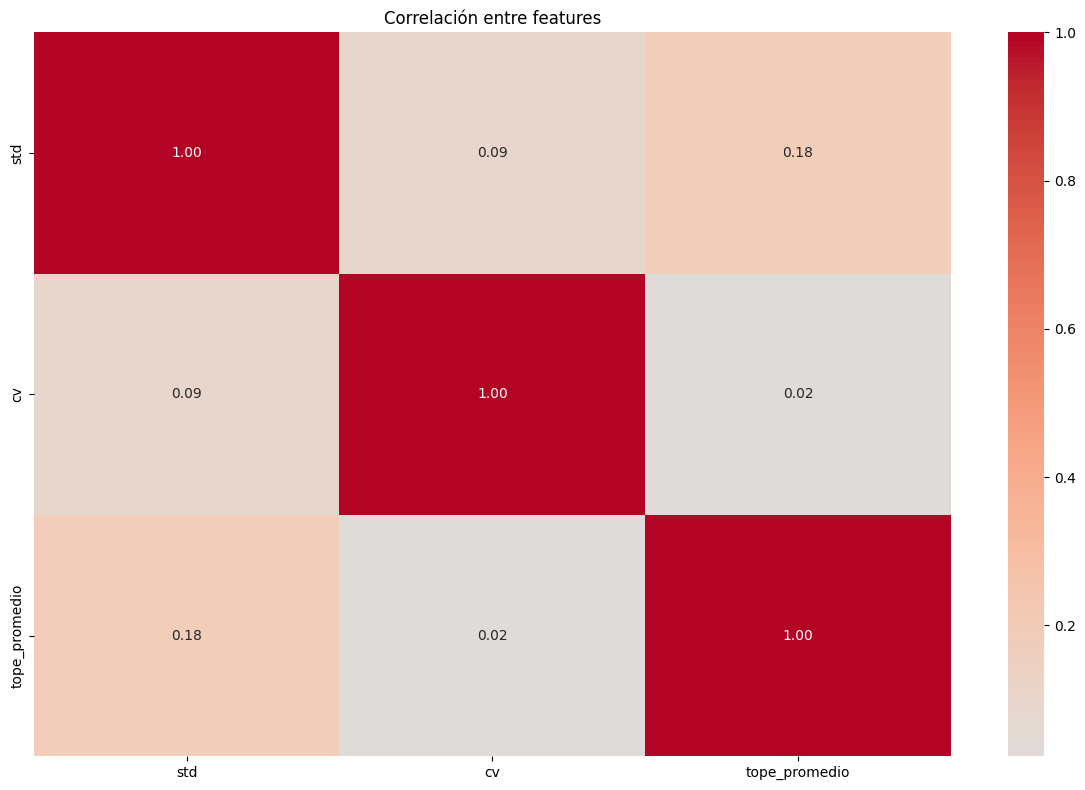

In [16]:
cols_features = ['std', 
                  'cv','tope_promedio']

corr = features_completos[cols_features].corr()

plt.figure(figsize=(12, 8))
import seaborn as sns
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlación entre features')
plt.tight_layout()
plt.show()

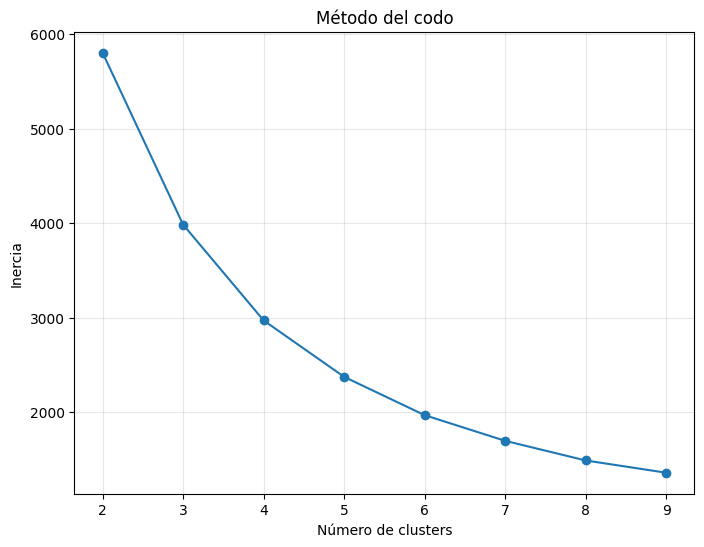

               std    cv  tope_promedio
cluster                                
0.0      203800.55  0.87     1800159.15
1.0      458442.95  0.89     2877272.73
2.0      206189.32  1.20     2867228.92
3.0      152197.67  0.74     2880125.92


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ============================================================
# ELEGIR QUÉ FEATURES METER AL CLUSTER
# ============================================================
# Puedes meter todas o seleccionar las más relevantes
columnas_cluster = [
   'std',
  'cv',
          'tope_promedio'        # crecimiento (casi independiente de todo)
                            
]

# Filtrar filas sin nulos
mask = features_completos[columnas_cluster].notna().all(axis=1)


#q99 = features_completos['mediana'].quantile(0.99)
#mask_outliers = features_completos['mediana'] < q99

X = features_completos.loc[mask, columnas_cluster]

# Normalizar (obligatorio para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo
inercias = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inercias.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), inercias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.grid(True, alpha=0.3)
plt.show()

# Aplicar con k elegido
k_optimo = 4
km_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
features_completos.loc[mask, 'cluster'] = km_final.fit_predict(X_scaled).astype(int)

# Ver resultado
print(features_completos.groupby('cluster')[columnas_cluster].mean().round(2))

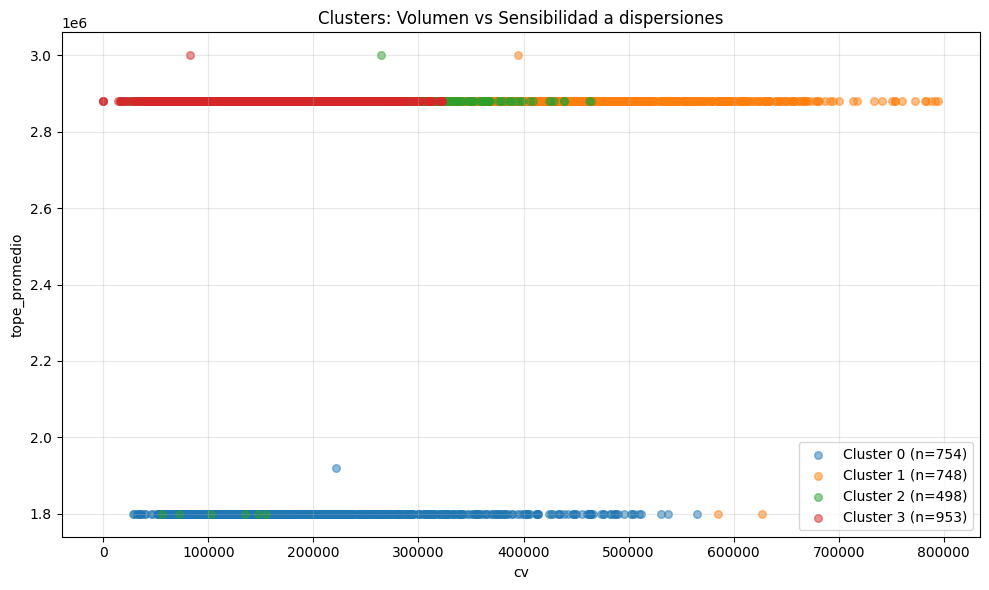

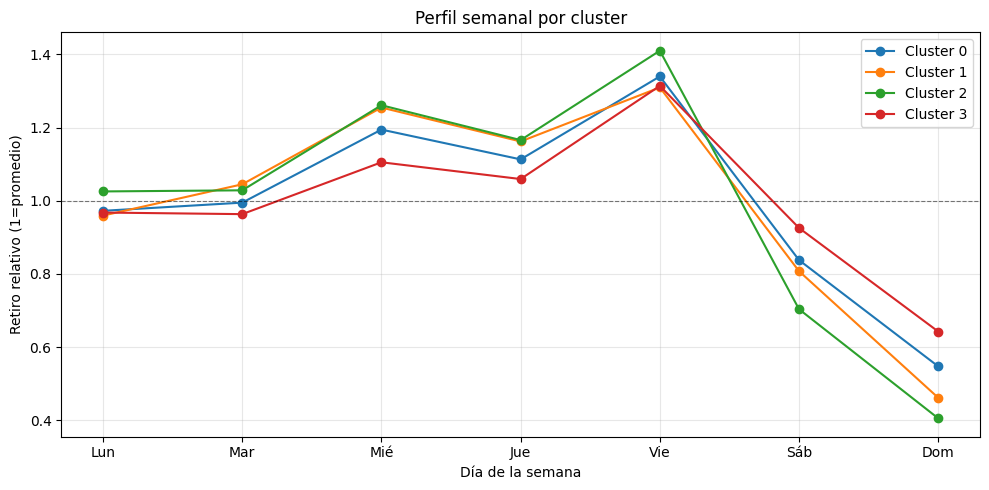

In [18]:
# ============================================================
# GRÁFICA 1: SCATTER - Volumen vs Sensibilidad a dispersión
# ============================================================
fig, ax = plt.subplots(figsize=(10, 6))

for c in sorted(features_completos['cluster'].dropna().unique()):
    subset = features_completos[features_completos['cluster'] == c]
    ax.scatter(subset['std'], subset['tope_promedio'],
               label=f'Cluster {int(c)} (n={len(subset)})', alpha=0.5, s=30)

ax.set_xlabel('cv')
ax.set_ylabel('tope_promedio')
ax.set_title('Clusters: Volumen vs Sensibilidad a dispersiones')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# GRÁFICA 2: PERFIL SEMANAL POR CLUSTER
# ============================================================
dias = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
cols_dias = [f'dia_{i}' for i in range(7)]

fig, ax = plt.subplots(figsize=(10, 5))
for c in sorted(features_completos['cluster'].dropna().unique()):
    subset = features_completos[features_completos['cluster'] == c]
    perfil = subset[cols_dias].mean().values
    ax.plot(dias, perfil, marker='o', label=f'Cluster {int(c)}')

ax.axhline(1, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Retiro relativo (1=promedio)')
ax.set_title('Perfil semanal por cluster')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
from sklearn.manifold import TSNE

tsne=TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=100,
    random_state=42

)
X_tsne=tsne.fit_transform(X_scaled)

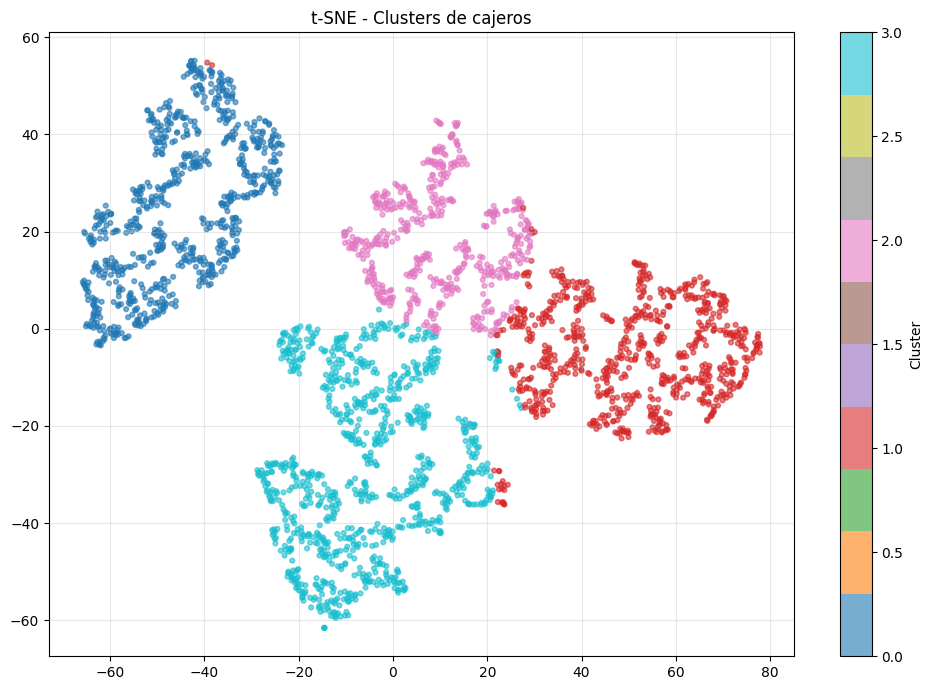

In [20]:
# Asegurarte de usar el mismo índice que usaste para X_scaled
idx_validos = features_completos.loc[mask, 'cluster'].index

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=features_completos.loc[idx_validos, 'cluster'].values,
    cmap='tab10',
    s=12,
    alpha=0.6
)
plt.colorbar(scatter, label='Cluster')
plt.title('t-SNE - Clusters de cajeros')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [21]:
# Ver características promedio por cluster
resumen = features_completos.groupby('cluster').agg(
    n_cajeros=('cajero', 'count'),
    cv_promedio=('cv', 'mean'),
    volatilidad_promedio=('std', 'mean'),
    tope_promedio=('tope_promedio', 'mean'),
    mediana_promedio=('mediana', 'mean'),
    ratio_dispersion_promedio=('ratio_dispersion', 'mean'),
).round(2)

resumen.head()

n_cajeros  cv_promedio  volatilidad_promedio  tope_promedio  \
cluster                                                                
0.0            754         0.87             203800.55     1800159.15   
1.0            748         0.89             458442.95     2877272.73   
2.0            498         1.20             206189.32     2867228.92   
3.0            953         0.74             152197.67     2880125.92   

         mediana_promedio  ratio_dispersion_promedio  
cluster                                               
0.0             176662.33                       2.44  
1.0             388017.98                       2.91  
2.0             108577.11                       3.11  
3.0             175890.03                       1.95

In [22]:
etiquetas = {
    0.0: 'volatil_event_driven',
    1.0: 'normal_moderado',
    2.0: 'grande_activo',
    3.0: 'estable'
}
features_completos['tipo_cajero'] = features_completos['cluster'].map(etiquetas)
print(features_completos['tipo_cajero'].value_counts())

tipo_cajero
estable                 953
volatil_event_driven    754
normal_moderado         748
grande_activo           498
Name: count, dtype: int64


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
import seaborn as sns

# Suponiendo que tienes tus datos en un DataFrame llamado 'df'
# y las features seleccionadas en 'X'

def evaluar_numero_clusters(X, max_k=10):
    """
    Evalúa diferentes números de clusters usando múltiples métricas
    """
    resultados = {
        'k': [],
        'inertia': [],
        'silhouette': [],
        'davies_bouldin': [],
        'calinski_harabasz': []
    }
    
    for k in range(2, max_k + 1):
        # Aplicar K-means
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        
        # Calcular métricas
        resultados['k'].append(k)
        resultados['inertia'].append(kmeans.inertia_)
        resultados['silhouette'].append(silhouette_score(X, labels))
        resultados['davies_bouldin'].append(davies_bouldin_score(X, labels))
        resultados['calinski_harabasz'].append(calinski_harabasz_score(X, labels))
    
    return pd.DataFrame(resultados)

def visualizar_metricas(resultados):
    """
    Visualiza las métricas de evaluación
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Método del codo (Elbow)
    axes[0, 0].plot(resultados['k'], resultados['inertia'], 'bo-')
    axes[0, 0].set_xlabel('Número de Clusters (k)')
    axes[0, 0].set_ylabel('Inertia (Within-cluster sum of squares)')
    axes[0, 0].set_title('Método del Codo')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Silhouette Score (MAYOR es mejor)
    axes[0, 1].plot(resultados['k'], resultados['silhouette'], 'go-')
    axes[0, 1].set_xlabel('Número de Clusters (k)')
    axes[0, 1].set_ylabel('Silhouette Score')
    axes[0, 1].set_title('Silhouette Score (↑ mejor)')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='Umbral bueno (0.5)')
    axes[0, 1].legend()
    
    # 3. Davies-Bouldin Index (MENOR es mejor)
    axes[1, 0].plot(resultados['k'], resultados['davies_bouldin'], 'ro-')
    axes[1, 0].set_xlabel('Número de Clusters (k)')
    axes[1, 0].set_ylabel('Davies-Bouldin Index')
    axes[1, 0].set_title('Davies-Bouldin Index (↓ mejor)')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Calinski-Harabasz Score (MAYOR es mejor)
    axes[1, 1].plot(resultados['k'], resultados['calinski_harabasz'], 'mo-')
    axes[1, 1].set_xlabel('Número de Clusters (k)')
    axes[1, 1].set_ylabel('Calinski-Harabasz Score')
    axes[1, 1].set_title('Calinski-Harabasz Score (↑ mejor)')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('metricas_clustering.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig

def interpretar_silhouette(score):
    """
    Interpreta el Silhouette Score
    """
    if score > 0.7:
        return "Excelente - Clusters muy bien definidos"
    elif score > 0.5:
        return "Bueno - Estructura de clusters razonable"
    elif score > 0.25:
        return "Regular - Clusters débiles o solapados"
    else:
        return "Pobre - Estructura de clusters débil"

# EJEMPLO DE USO:
# ===============

# 1. Selecciona tus features (basado en la matriz de correlación)
# features_seleccionadas = ['tope_promedio', 'entropia', 'cv', 'ratio_med_medi']
# X = df[features_seleccionadas]

# 2. Normaliza los datos (MUY IMPORTANTE para K-means)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# 3. Evalúa diferentes números de clusters
# resultados = evaluar_numero_clusters(X_scaled, max_k=10)
# print(resultados)

# 4. Visualiza las métricas
# visualizar_metricas(resultados)

# 5. Para evaluar tu clustering actual (asumiendo k=5):
# kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
# labels = kmeans.fit_predict(X_scaled)
# score = silhouette_score(X_scaled, labels)
# print(f"Silhouette Score (k=5): {score:.3f}")
# print(f"Interpretación: {interpretar_silhouette(score)}")

# 6. Visualizar con t-SNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=30)
# X_tsne = tsne.fit_transform(X_scaled)
# plt.figure(figsize=(10, 8))
# scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', alpha=0.6)
# plt.colorbar(scatter)
# plt.title(f't-SNE Visualization (k=5, Silhouette={score:.3f})')
# plt.show()


# INTERPRETACIÓN DE MÉTRICAS:
# ==========================
"""
1. SILHOUETTE SCORE (-1 a 1):
   - Cerca de 1: Puntos bien asignados a su cluster
   - Cerca de 0: Puntos en el borde entre clusters
   - Negativo: Probablemente mal asignados
   - Busca el k con MAYOR silhouette

2. DAVIES-BOULDIN INDEX (0 a ∞):
   - Mide la similitud entre clusters
   - MENOR es mejor
   - Busca el k con MENOR índice

3. CALINSKI-HARABASZ (0 a ∞):
   - Ratio de dispersión entre/dentro clusters
   - MAYOR es mejor
   - Busca el k con MAYOR score

4. MÉTODO DEL CODO:
   - Busca el "codo" donde inertia deja de decrecer dramáticamente
   - Es más subjetivo pero muy útil
"""

'\n1. SILHOUETTE SCORE (-1 a 1):\n   - Cerca de 1: Puntos bien asignados a su cluster\n   - Cerca de 0: Puntos en el borde entre clusters\n   - Negativo: Probablemente mal asignados\n   - Busca el k con MAYOR silhouette\n\n2. DAVIES-BOULDIN INDEX (0 a ∞):\n   - Mide la similitud entre clusters\n   - MENOR es mejor\n   - Busca el k con MENOR índice\n\n3. CALINSKI-HARABASZ (0 a ∞):\n   - Ratio de dispersión entre/dentro clusters\n   - MAYOR es mejor\n   - Busca el k con MAYOR score\n\n4. MÉTODO DEL CODO:\n   - Busca el "codo" donde inertia deja de decrecer dramáticamente\n   - Es más subjetivo pero muy útil\n'

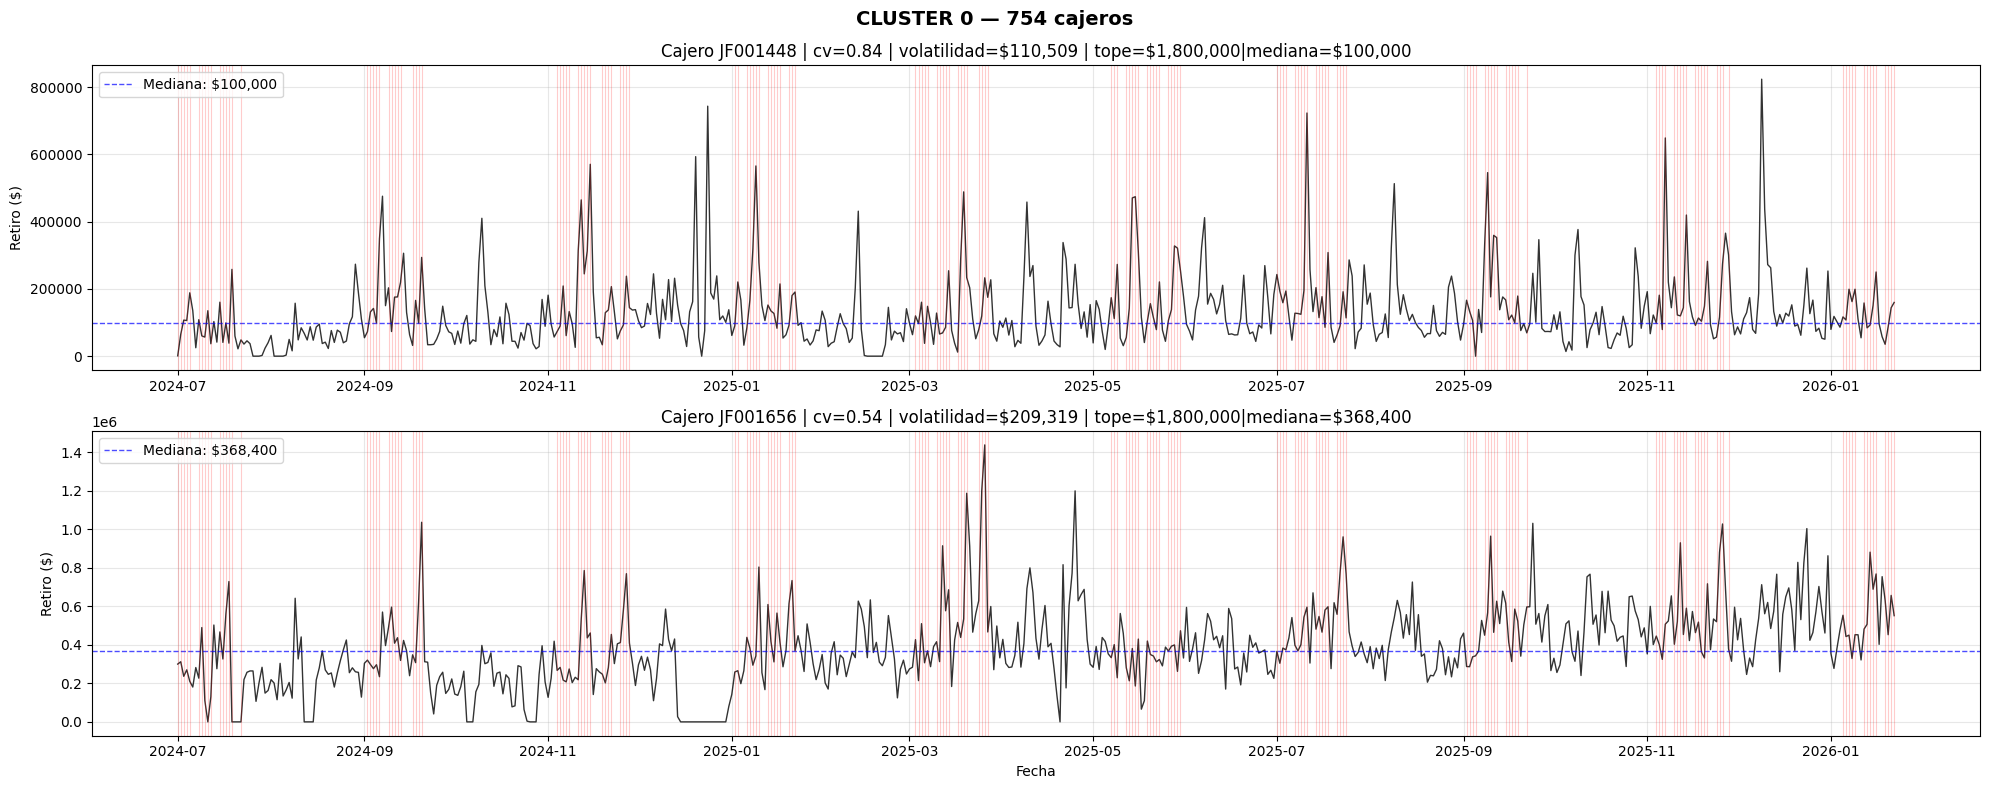

Cluster 0: 754 cajeros totales
--------------------------------------------------------------------------------


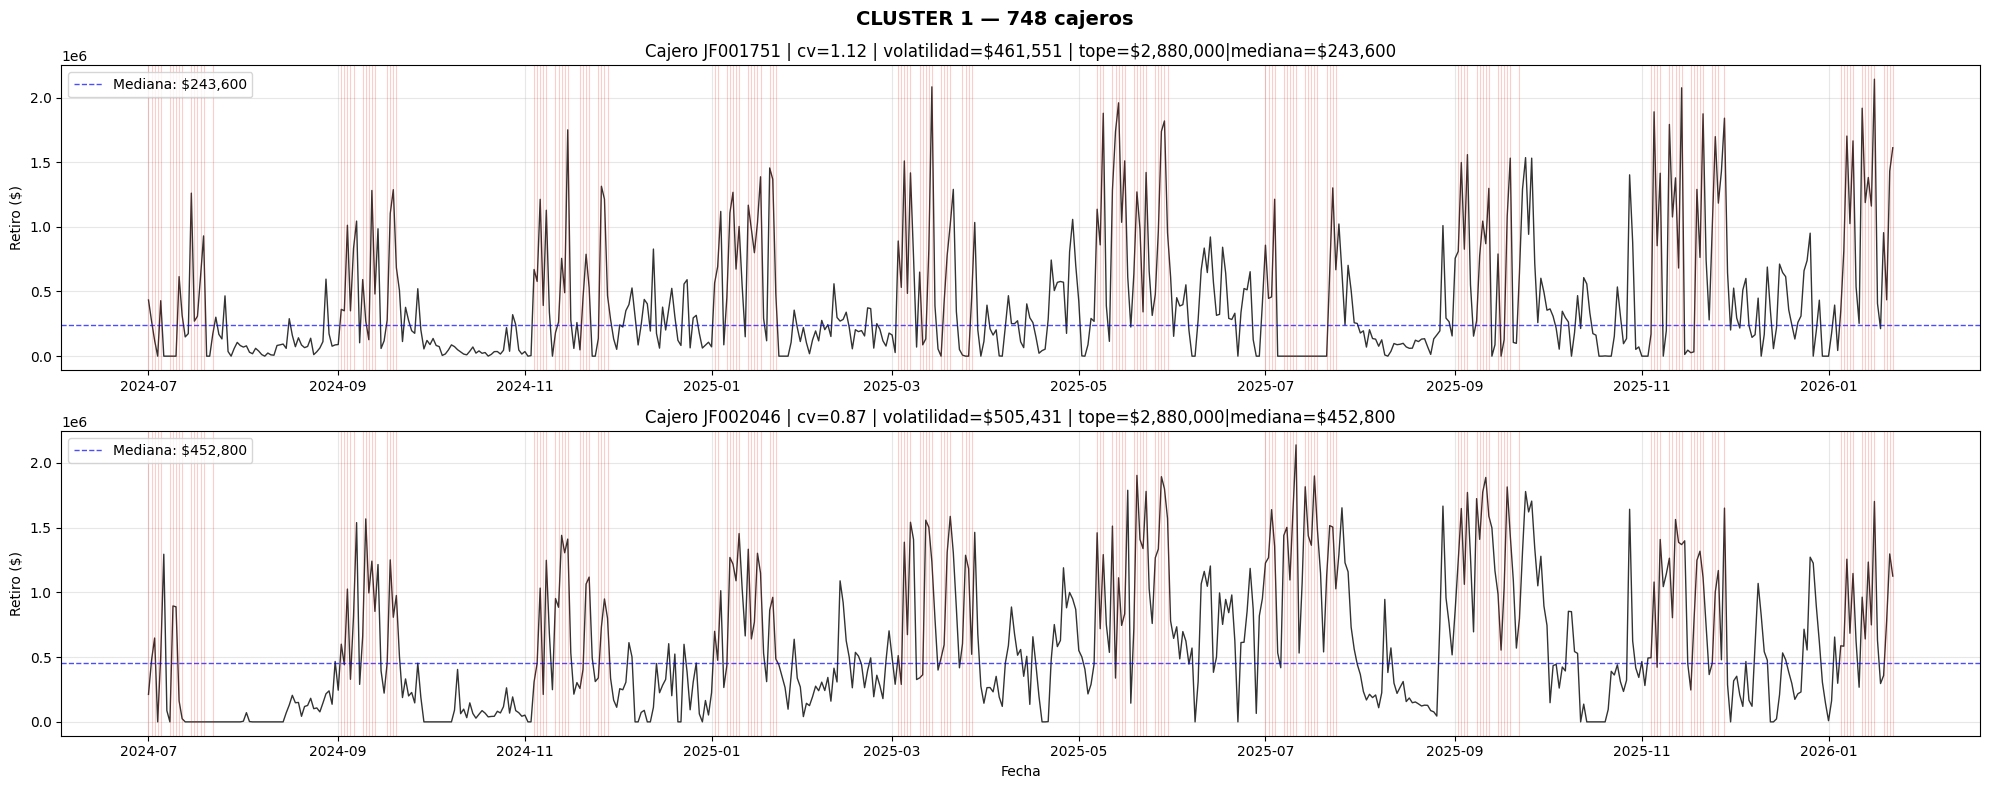

Cluster 1: 748 cajeros totales
--------------------------------------------------------------------------------


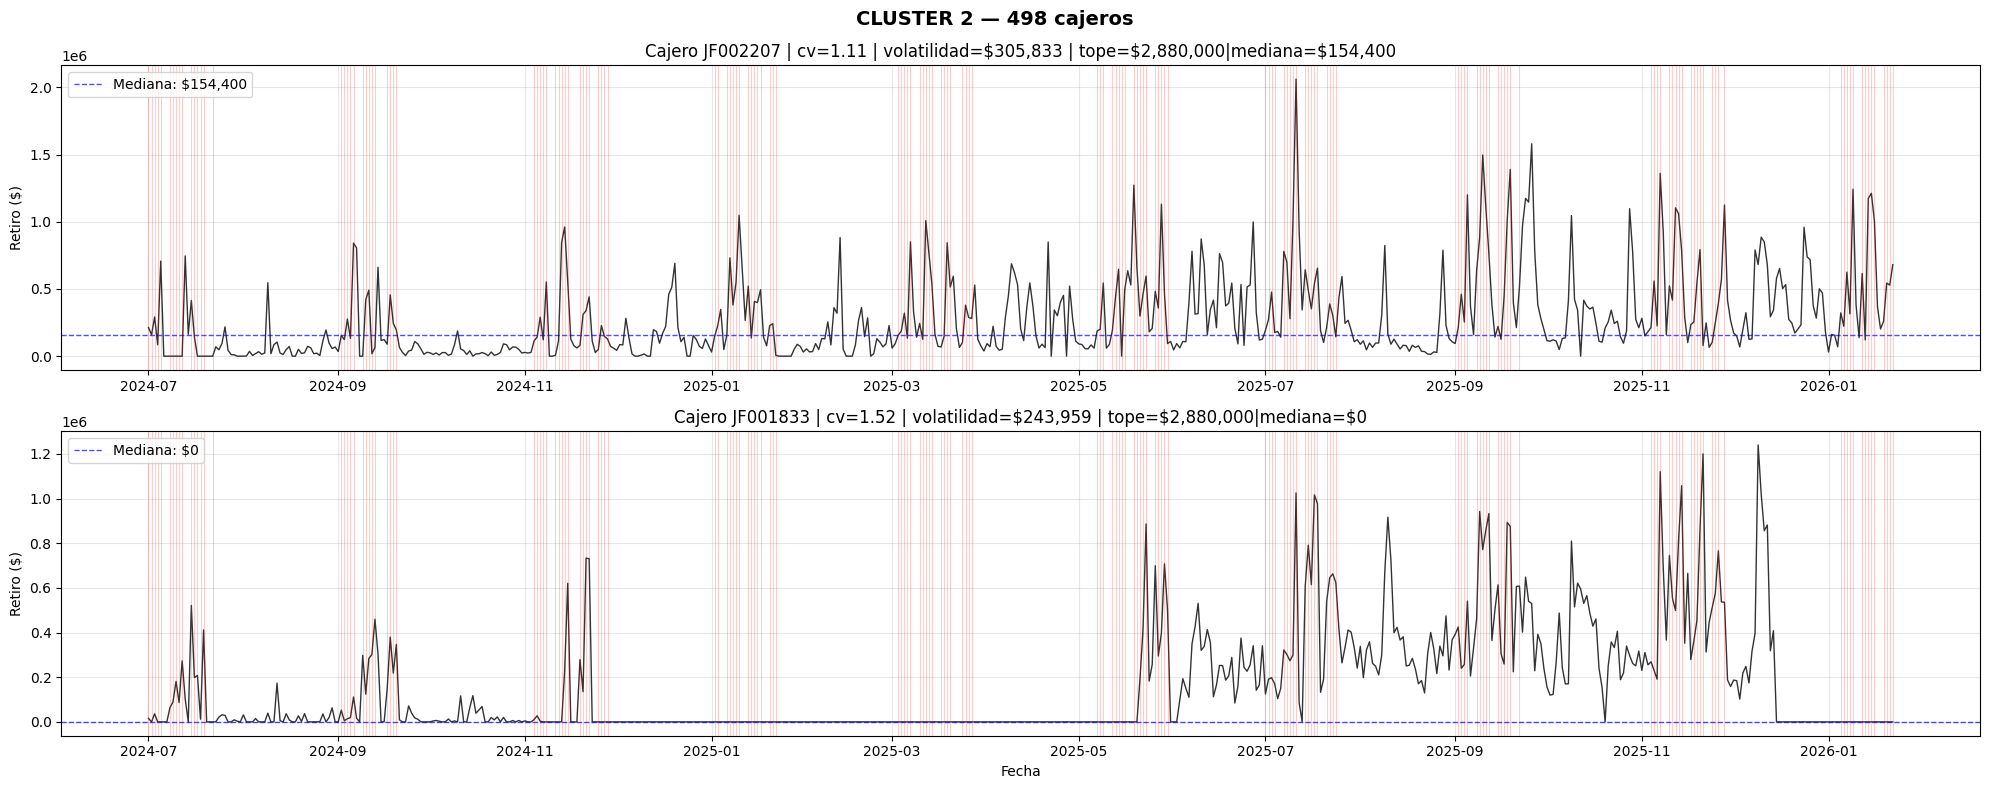

Cluster 2: 498 cajeros totales
--------------------------------------------------------------------------------


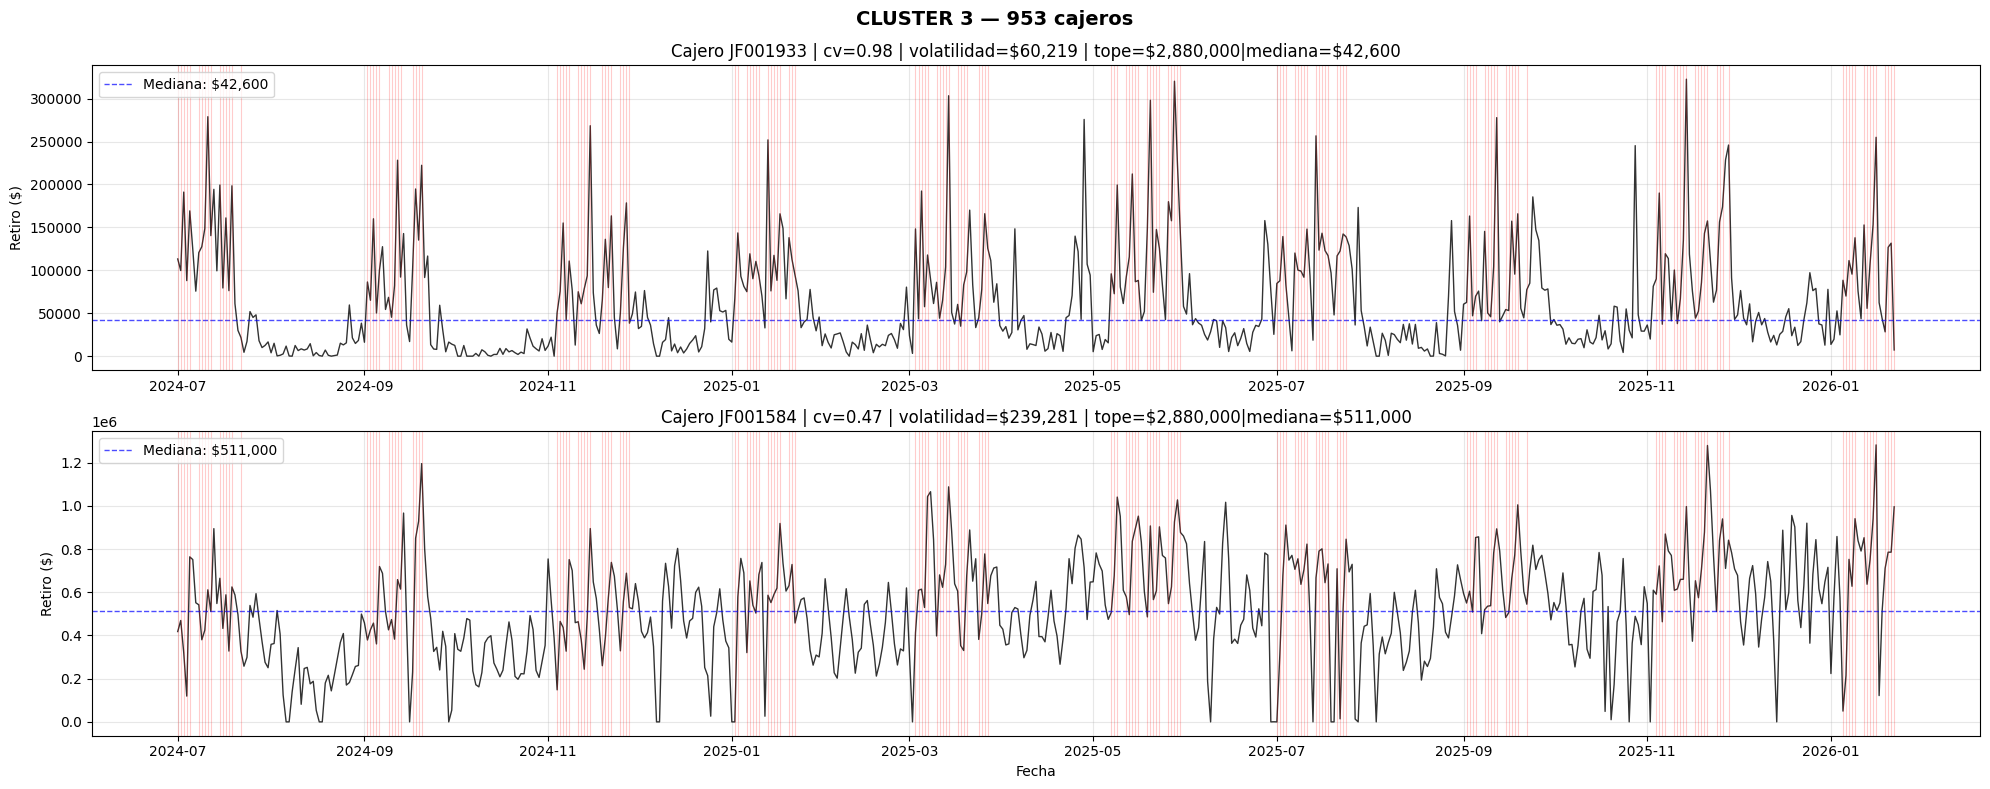

Cluster 3: 953 cajeros totales
--------------------------------------------------------------------------------


In [24]:
import matplotlib.pyplot as plt
import numpy as np

n_muestra = 2  # cajeros por cluster

for cluster_id in sorted(features_completos['cluster'].dropna().unique()):
    
    # Cajeros de este cluster
    cajeros_cluster = features_completos[
        features_completos['cluster'] == cluster_id
    ]['cajero'].values
    
    # Muestra aleatoria
    muestra = np.random.choice(
        cajeros_cluster, 
        size=min(n_muestra, len(cajeros_cluster)), 
        replace=False
    )
    
    fig, axes = plt.subplots(n_muestra, 1, figsize=(20, 4*n_muestra))
    fig.suptitle(
        f'CLUSTER {int(cluster_id)} — {len(cajeros_cluster)} cajeros', 
        fontsize=14, fontweight='bold'
    )
    
    for idx, cajero_id in enumerate(muestra):
        datos = df_analisis[df_analisis['cajero'] == cajero_id].sort_values('fecha')
        stats = features_completos[features_completos['cajero'] == cajero_id].iloc[0]
        
        axes[idx].plot(datos['fecha'], datos['retiro'], 
                      color='black', linewidth=1, alpha=0.8)
        
        # Línea de mediana
        axes[idx].axhline(stats['mediana'], color='blue', 
                         linestyle='--', linewidth=1, alpha=0.7,
                         label=f"Mediana: ${stats['mediana']:,.0f}")
        
        # Marcar dispersiones
        for fecha in holidays_df_agregado['ds'].unique():
            if datos['fecha'].min() <= fecha <= datos['fecha'].max():
                axes[idx].axvline(fecha, color='red', alpha=0.2, linewidth=0.8)
        
        axes[idx].set_title(
            f'Cajero {cajero_id} | '
            f'cv={stats["cv"]:.2f} | '
            f'volatilidad=${stats["std"]:,.0f} | '
            f'tope=${stats["tope_promedio"]:,.0f}|'
            f'mediana=${stats["mediana"]:,.0f}'
        )
        axes[idx].legend(loc='upper left')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].set_ylabel('Retiro ($)')
    
    axes[-1].set_xlabel('Fecha')
    plt.tight_layout()
    plt.show()
    print(f"Cluster {int(cluster_id)}: {len(cajeros_cluster)} cajeros totales")
    print("-"*80)

In [25]:
resultados=evaluar_numero_clusters(X_scaled,max_k=8)
print(resultados)

   k      inertia  silhouette  davies_bouldin  calinski_harabasz
0  2  5805.404197    0.438435        0.962478        1552.202208
1  3  3984.588206    0.432743        0.926176        1804.391577
2  4  2969.633455    0.440294        0.844008        1949.482117
3  5  2372.122503    0.432883        0.762686        2015.422353
4  6  1966.408945    0.415986        0.843178        2065.945223
5  7  1694.407901    0.389732        0.872469        2076.140266
6  8  1486.538717    0.374891        0.883873        2086.554341


In [26]:
# Quedarte solo con las columnas que necesitas de features_completos
clusters_cajeros = features_completos[['cajero', 'cluster']].dropna()

print(f"Cajeros con cluster asignado: {len(clusters_cajeros)}")
print(f"Distribución:")
print(clusters_cajeros['cluster'].value_counts().sort_index())

# Unir con el df de retiros
df_con_cluster = df.merge(clusters_cajeros, on='cajero', how='inner')

print(f"\nFilas antes del merge: {len(df)}")
print(f"Filas después del merge: {len(df_con_cluster)}")
print(f"Cajeros únicos: {df_con_cluster['cajero'].nunique()}")

Cajeros con cluster asignado: 2953
Distribución:
cluster
0.0    754
1.0    748
2.0    498
3.0    953
Name: count, dtype: int64

Filas antes del merge: 2226929
Filas después del merge: 2226562
Cajeros únicos: 2953


In [27]:
# Ver filas por cluster
print(df_con_cluster.groupby('cluster')['cajero'].nunique())

# Verificar que no hay NaN en cluster
print(f"NaN en cluster: {df_con_cluster['cluster'].isna().sum()}")

# Ver rango de fechas
print(f"Fechas: {df_con_cluster['fecha'].min()} → {df_con_cluster['fecha'].max()}")

cluster
0.0    754
1.0    748
2.0    498
3.0    953
Name: cajero, dtype: int64
NaN en cluster: 0
Fechas: 2023-12-31 00:00:00 → 2026-01-22 00:00:00


In [28]:
cols_n=['cv','std','tope_promedio']

In [47]:
cajeros_cluster[cols_n]

cv            std  tope_promedio
0    0.864644  321814.239499      1800000.0
1    0.829796  237464.862216      1800000.0
2    0.672419  180948.713023      1800000.0
3    0.597815  353070.624472      1800000.0
4    0.750295  262841.067242      1800000.0
..        ...            ...            ...
749  0.808030   63634.864067      1800000.0
750  0.804487  249114.606628      1800000.0
751  1.019748  256414.660702      1800000.0
752  1.169265  313580.142984      1800000.0
753  1.002198  137836.924072      1800000.0

[754 rows x 3 columns]

In [48]:
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

cajeros_representativos = {}

for cluster_id in sorted(features_completos['cluster'].dropna().unique()):
    
    # Cajeros de este cluster
    mask_cluster = features_completos['cluster'] == cluster_id
    cajeros_cluster = features_completos[mask_cluster].reset_index(drop=True)
    
    # Features escaladas de este cluster
    X_cluster = scaler.fit_transform(cajeros_cluster[cols_n])
    
    # Centroide del cluster
    centroide = km_final.cluster_centers_[int(cluster_id)].reshape(1, -1)
    
    # Distancia de cada cajero al centroide
    distancias = np.linalg.norm(X_cluster - centroide, axis=1)
    
    # Los 2 más cercanos al centroide
    idx_cercanos = np.argsort(distancias)[:2]
    cajeros_rep = cajeros_cluster.iloc[idx_cercanos]['cajero'].values
    
    cajeros_representativos[cluster_id] = cajeros_rep
    print(f"Cluster {int(cluster_id)}: {cajeros_rep}")

print("\nResumen:")
print(cajeros_representativos)

Cluster 0: ['JF000673' 'JF001247']
Cluster 1: ['JF000704' 'JF000534']
Cluster 2: ['JF001831' 'JF001642']
Cluster 3: ['JF002287' 'JF001650']

Resumen:
{0.0: array(['JF000673', 'JF001247'], dtype=object), 1.0: array(['JF000704', 'JF000534'], dtype=object), 2.0: array(['JF001831', 'JF001642'], dtype=object), 3.0: array(['JF002287', 'JF001650'], dtype=object)}


In [49]:
# BLOQUE 1 - Verificar que tenemos todo lo necesario
print("Verificando dependencias...")

# Datos
print(f"df shape: {df.shape}")
print(f"df_con_cluster shape: {df_con_cluster.shape}")
print(f"features_completos shape: {features_completos.shape}")

# Cajeros representativos
print(f"\nCajeros representativos:")
for cluster_id, cajeros in cajeros_representativos.items():
    print(f"  Cluster {int(cluster_id)}: {cajeros}")

# Holidays
print(f"\nHolidays:")
print(f"  Eventos únicos: {holidays_df_agregado['holiday'].nunique()}")
print(f"  Total registros: {len(holidays_df_agregado)}")

# Fecha inicio
fecha_inicio = '2024-07-01'
print(f"\nFecha inicio: {fecha_inicio}")

Verificando dependencias...
df shape: (2226929, 27)
df_con_cluster shape: (2226562, 28)
features_completos shape: (2953, 35)

Cajeros representativos:
  Cluster 0: ['JF000673' 'JF001247']
  Cluster 1: ['JF000704' 'JF000534']
  Cluster 2: ['JF001831' 'JF001642']
  Cluster 3: ['JF002287' 'JF001650']

Holidays:
  Eventos únicos: 3
  Total registros: 615

Fecha inicio: 2024-07-01


In [50]:
# BLOQUE 2 - Preparar datos del Cluster 0 (prueba con uno solo)
cluster_prueba = 0.0
cajeros_rep = cajeros_representativos[cluster_prueba]

dfs = []
for cajero_id in cajeros_rep:
    df_cajero = df[
        (df['cajero'] == cajero_id) &
        (df['fecha'] >= fecha_inicio)
    ][['fecha', 'retiro']].copy()
    
    df_cajero.columns = ['ds', 'y']
    df_cajero['ID'] = cajero_id
    df_cajero = df_cajero.sort_values('ds').reset_index(drop=True)
    dfs.append(df_cajero)

df_train = pd.concat(dfs, ignore_index=True)

print(f"Cluster {int(cluster_prueba)}: {cajeros_rep}")
print(f"Shape df_train: {df_train.shape}")
print(f"Cajeros únicos: {df_train['ID'].unique()}")
print(f"Fechas: {df_train['ds'].min()} → {df_train['ds'].max()}")
print(f"Filas por cajero:")
print(df_train.groupby('ID').size())
print(f"\nPrimeras filas:")
print(df_train.head())

Cluster 0: ['JF000673' 'JF001247']
Shape df_train: (1142, 3)
Cajeros únicos: ['JF000673' 'JF001247']
Fechas: 2024-07-01 00:00:00 → 2026-01-22 00:00:00
Filas por cajero:
ID
JF000673    571
JF001247    571
dtype: int64

Primeras filas:
          ds         y        ID
0 2024-07-01  306100.0  JF000673
1 2024-07-02  242900.0  JF000673
2 2024-07-03  536100.0  JF000673
3 2024-07-04  179700.0  JF000673
4 2024-07-05  545500.0  JF000673


In [67]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# ============================================================
# 1. PREPARAR DATOS
# ============================================================
fecha_inicio = '2024-07-01'
fecha_corte  = '2025-03-01'
fecha_val    = '2025-04-01'  # corte train / validación (dentro del train)

todos = features_completos[features_completos['cluster'] == 0.0]['cajero'].values
cajeros_cluster0 = np.random.choice(todos, size=20, replace=False)
print(f"Muestra: {len(cajeros_cluster0)} cajeros")
print(cajeros_cluster0)

dfs_train = []
dfs_test  = []

for cajero_id in cajeros_cluster0:
    df_cajero = df[
        (df['fecha'] >= fecha_inicio) &
        (df['cajero'] == cajero_id)
    ][['fecha', 'retiro']].copy()
    df_cajero.columns = ['ds', 'y']
    df_cajero['ID'] = cajero_id
    df_cajero = df_cajero.sort_values('ds').reset_index(drop=True)

    dfs_train.append(df_cajero[df_cajero['ds'] <  fecha_corte])
    dfs_test.append( df_cajero[df_cajero['ds'] >= fecha_corte])

df_train = pd.concat(dfs_train, ignore_index=True)
df_test  = pd.concat(dfs_test,  ignore_index=True)

print(f"Train: {df_train['ds'].min()} → {df_train['ds'].max()} ({len(df_train)} filas)")
print(f"Test:  {df_test['ds'].min()}  → {df_test['ds'].max()}  ({len(df_test)} filas)")

# ============================================================
# 2. AGREGAR HOLIDAYS
# ============================================================
holidays_usar = holidays_df_agregado
holidays_usar['ds'] = pd.to_datetime(holidays_usar['ds'])

for holiday_name in holidays_usar['holiday'].unique():
    fechas_holiday = pd.to_datetime(
        holidays_usar[holidays_usar['holiday'] == holiday_name]['ds'].values
    )
    for df_ in [df_train, df_test]:
        df_[holiday_name] = df_['ds'].isin(fechas_holiday).astype(int)
        for i in range(1, 4):
            df_.loc[df_['ds'].isin(fechas_holiday + pd.Timedelta(days=i)), holiday_name] = 1

print(f"Columnas: {df_train.columns.tolist()}")

# ============================================================
# 3. CONFIGURAR MODELO
# ============================================================
modelo = NeuralProphet(
    growth='linear',
    n_changepoints=6,
    changepoints_range=0.9,
    trend_reg=8,
    n_lags=60,
    ar_reg=5,
    yearly_seasonality=50,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive',
    seasonality_reg=2,
    n_forecasts=20,
    epochs=300,
    batch_size=64,
    learning_rate=0.0045,
    loss_func='Huber',
    normalize='standardize',
    impute_missing=True,
    optimizer="AdamW"
)

print(metrics.columns.tolist())

for holiday_name in holidays_usar['holiday'].unique():
    modelo = modelo.add_events(
        holiday_name,
        lower_window=0,
        upper_window=3,
        regularization=0.1
    )

# ============================================================
# 4. ENTRENAR CON VALIDACIÓN
# ============================================================
df_train_fit = df_train[df_train['ds'] <  fecha_val]
df_val       = df_train[df_train['ds'] >= fecha_val]

print(f"\nTrain fit: {df_train_fit['ds'].min()} → {df_train_fit['ds'].max()} ({len(df_train_fit)} filas)")
print(f"Val:       {df_val['ds'].min()} → {df_val['ds'].max()} ({len(df_val)} filas)")

print("\nIniciando entrenamiento...")
metrics = modelo.fit(
    df_train_fit,
    freq='D',
    early_stopping=False,
    validation_df=df_val
)
print("Entrenamiento completado.")

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(metrics['Loss'],     label='Train Loss',      color='steelblue', linewidth=1.5)
ax.plot(metrics['Loss_val'], label='Validation Loss', color='tomato',    linewidth=1.5, linestyle='--')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Curva de pérdida - Cluster 0')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# 5. PREDECIR SOBRE TRAIN Y TEST
# ============================================================
forecast_train = modelo.predict(df_train)
forecast_test  = modelo.predict(df_test)

def merge_pred(df_real, forecast):
    merged = df_real[['ds', 'y', 'ID']].merge(
        forecast[['ds', 'yhat1', 'ID']], on=['ds', 'ID']
    ).dropna(subset=['yhat1']).copy()
    merged['yhat1'] = merged['yhat1'].clip(lower=0)
    return merged

merged_train = merge_pred(df_train, forecast_train)
merged_test  = merge_pred(df_test,  forecast_test)

# ── Métricas globales ──────────────────────────────────────────────────────
for nombre, merged in [("TRAIN", merged_train), ("TEST", merged_test)]:
    r2   = r2_score(merged['y'], merged['yhat1'])
    mae  = mean_absolute_error(merged['y'], merged['yhat1'])
    rmse = np.sqrt(((merged['yhat1'] - merged['y'])**2).mean())
    print(f"\nMétricas {nombre}:")
    print(f"  R²:   {r2:.4f}")
    print(f"  MAE:  ${mae:,.0f}")
    print(f"  RMSE: ${rmse:,.0f}")

# ── Métricas por cajero ────────────────────────────────────────────────────
print("\nMétricas por cajero:")
for cajero_id in cajeros_cluster0:
    for nombre, merged in [("train", merged_train), ("test", merged_test)]:
        sub = merged[merged['ID'] == cajero_id]
        if len(sub) == 0:
            continue
        r2_c  = r2_score(sub['y'], sub['yhat1'])
        mae_c = mean_absolute_error(sub['y'], sub['yhat1'])
        print(f"  {cajero_id} [{nombre}] → R²: {r2_c:.4f} | MAE: ${mae_c:,.0f}")

# ============================================================
# 6. GRAFICAR POR CAJERO
# ============================================================
n_cajeros = len(cajeros_cluster0)
fig, axes = plt.subplots(n_cajeros, 1, figsize=(20, 5 * n_cajeros))

if n_cajeros == 1:
    axes = [axes]

for idx, cajero_id in enumerate(cajeros_cluster0):
    real_train = df_train[df_train['ID'] == cajero_id].sort_values('ds')
    real_test  = df_test[df_test['ID']   == cajero_id].sort_values('ds')
    pred_train = merged_train[merged_train['ID'] == cajero_id].sort_values('ds')
    pred_test  = merged_test[merged_test['ID']   == cajero_id].sort_values('ds')

    ax = axes[idx]

    # Reales
    ax.plot(real_train['ds'], real_train['y'],
            label='Real Train', color='black', linewidth=1.2, alpha=0.6)
    ax.plot(real_test['ds'],  real_test['y'],
            label='Real Test',  color='gray',  linewidth=1.2, alpha=0.6)

    # Predicciones
    ax.plot(pred_train['ds'], pred_train['yhat1'],
            label='Pred Train', color='orange', linewidth=1.5, linestyle='--', alpha=0.85)
    ax.plot(pred_test['ds'],  pred_test['yhat1'],
            label='Pred Test',  color='red',    linewidth=1.5, alpha=0.85)

    # Líneas de corte
    ax.axvline(pd.Timestamp(fecha_val),    color='purple', linestyle=':', linewidth=1.2, label='Corte val')
    ax.axvline(pd.Timestamp(fecha_corte),  color='green',  linestyle='--', linewidth=1.5, label='Corte train/test')

    # Holidays
    for fecha in pd.to_datetime(holidays_usar['ds'].unique()):
        if real_train['ds'].min() <= fecha <= real_test['ds'].max():
            ax.axvline(fecha, color='blue', alpha=0.2, linewidth=0.5)

    # Métricas en título
    r2_tr  = r2_score(pred_train['y'], pred_train['yhat1']) if len(pred_train) > 0 else float('nan')
    mae_tr = mean_absolute_error(pred_train['y'], pred_train['yhat1']) if len(pred_train) > 0 else float('nan')
    r2_te  = r2_score(pred_test['y'],  pred_test['yhat1'])  if len(pred_test)  > 0 else float('nan')
    mae_te = mean_absolute_error(pred_test['y'],  pred_test['yhat1'])  if len(pred_test)  > 0 else float('nan')

    ax.set_title(
        f'Cluster 0 | Cajero {cajero_id} | '
        f'Train → R²: {r2_tr:.4f} MAE: ${mae_tr:,.0f} | '
        f'Test  → R²: {r2_te:.4f} MAE: ${mae_te:,.0f}'
    )
    ax.legend(loc='upper left', fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_ylabel('Retiro ($)')

axes[-1].set_xlabel('Fecha')
plt.tight_layout()
plt.show()

Muestra: 20 cajeros
['JF001645' 'JF001695' 'JF001880' 'JF000910' 'JF001683' 'JF000723'
 'JF000537' 'JF000601' 'JF000804' 'JF001185' 'JF000968' 'JF001410'
 'JF000491' 'JF000788' 'JF001640' 'JF001461' 'JF000286' 'JF000464'
 'JF000359' 'JF001027']


INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  if df.groupby("ID").apply(lambda x: x.duplicated("ds").any()).any():

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralp

Train: 2024-07-01 00:00:00 → 2025-02-28 00:00:00 (4860 filas)
Test:  2025-03-01 00:00:00  → 2026-01-22 00:00:00  (6560 filas)
Columnas: ['ds', 'y', 'ID', 'adultos_mayores', 'discapacidad', 'madres_trabajadoras']
['MAE_val', 'RMSE_val', 'Loss_val', 'RegLoss_val', 'epoch', 'train_loss', 'reg_loss', 'MAE', 'RMSE', 'Loss', 'RegLoss']

Train fit: 2024-07-01 00:00:00 → 2025-02-28 00:00:00 (4860 filas)
Val:       NaT → NaT (0 filas)

Iniciando entrenamiento...


WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is de

ValueError: Dataframe has less than n_forecasts + n_lags rows. Forecasting not possible. Please either use a larger dataset, or adjust the model parameters.

In [68]:
print(f"n_forecasts + n_lags = {30 + 15} filas mínimas necesarias")
print(f"Filas en df_val con fecha_val='2025-06-01': {len(df_train[df_train['ds'] >= '2025-06-01'])}")
print(f"Filas en df_val con fecha_val='2025-05-01': {len(df_train[df_train['ds'] >= '2025-05-01'])}")
print(f"Filas en df_val con fecha_val='2025-04-01': {len(df_train[df_train['ds'] >= '2025-04-01'])}")
print(f"Filas en df_val con fecha_val='2025-03-01': {len(df_train[df_train['ds'] >= '2025-03-01'])}")

n_forecasts + n_lags = 45 filas mínimas necesarias
Filas en df_val con fecha_val='2025-06-01': 0
Filas en df_val con fecha_val='2025-05-01': 0
Filas en df_val con fecha_val='2025-04-01': 0
Filas en df_val con fecha_val='2025-03-01': 0


In [61]:
print(metrics.columns.tolist())

['MAE_val', 'RMSE_val', 'Loss_val', 'RegLoss_val', 'epoch', 'train_loss', 'reg_loss', 'MAE', 'RMSE', 'Loss', 'RegLoss']


In [ ]:
print(f"fecha_corte: {fecha_corte}")
print(f"Train hasta: {df_train['ds'].max()}")
print(f"Test desde:  {df_test['ds'].min()}")

fecha_corte: 2025-03-01
Train hasta: 2025-02-28 00:00:00
Test desde:  2025-03-01 00:00:00


INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.


Cajero JF000989: 571 observaciones desde 2024-07-01
Rango: 2024-07-01 00:00:00 → 2026-01-22 00:00:00

Holidays: granular
  Eventos únicos: 81
  Total registros: 1110

CONFIGURANDO MODELO NEURALPROPHET


INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
WARNING - (NP.forecaster.fit) - Early stopping is enabled, but regularization only starts after half the number of configured                         epochs. If you see no impact of the regularization, turn off the early_stopping or reduce the                         number of epochs to train for.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this wa


Parámetros configurados:
  --- Tendencia ---
  n_changepoints:      6
  trend_reg:           5
  --- AR ---
  n_lags:              60
  ar_reg:              0.01
  --- Red Neuronal ---
  num_hidden_layers:   2
  d_hidden:            64
  --- Estacionalidad ---
  yearly_seasonality:  52
  seasonality_reg:     3
  seasonality_mode:    additive
  --- Entrenamiento ---
  epochs:              150
  batch_size:          32
  learning_rate:       0.005
  --- Datos ---
  Holidays únicos:     81

Agregando holidays como eventos...
  Eventos agregados: 81

Iniciando entrenamiento...


WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\time_dataset.py:561: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  additive_events[key] = offset_feature

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\time_dataset.py:561: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  additive_events[key] = offset_feature

WARNING - (py.warnings._showwarnmsg) - c:\Users\di

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\pytorch_lightning\utilities\_pytree.py:21: `isinstance(treespec, LeafSpec)` is deprecated, use `isinstance(treespec, TreeSpec) and treespec.is_leaf()` instead.



Epoch 1:   1%|          | 1/150 [00:00<00:00, 283.99it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 31. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |          | 0/? [00:58<?, ?it/s, v_num=42, train_loss=0.399, reg_loss=0.182, MAE=5.67e+4, RMSE=8.06e+4, Loss=0.399, RegLoss=0.182]
Entrenamiento completado.


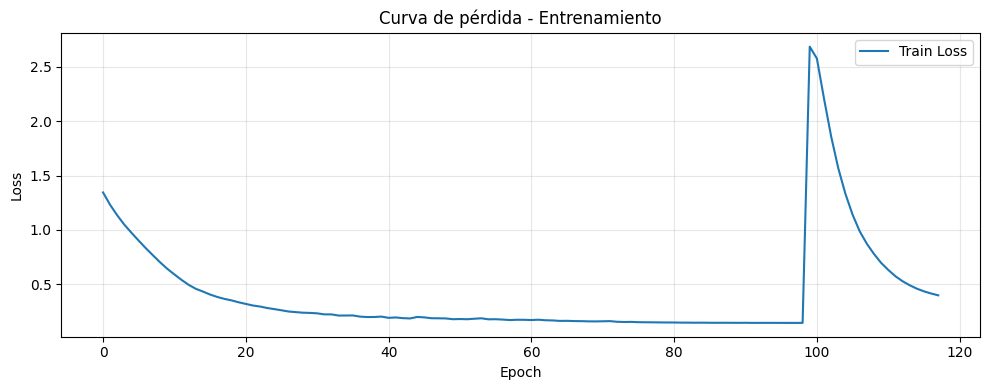

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.825% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\diana.lara\AppData\Local\miniconda3\envs\prophet_simple\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view i

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



Columnas disponibles en forecast:
['ds', 'y', 'ar1', 'trend', 'season_yearly', 'season_weekly', 'events_additive', 'event_adultos_mayores_A', 'event_adultos_mayores_B', 'event_adultos_mayores_C', 'event_adultos_mayores_D', 'event_adultos_mayores_E', 'event_adultos_mayores_F', 'event_adultos_mayores_G', 'event_adultos_mayores_H', 'event_adultos_mayores_I', 'event_adultos_mayores_J', 'event_adultos_mayores_K', 'event_adultos_mayores_L', 'event_adultos_mayores_M', 'event_adultos_mayores_N', 'event_adultos_mayores_O', 'event_adultos_mayores_P', 'event_adultos_mayores_Q', 'event_adultos_mayores_R', 'event_adultos_mayores_S', 'event_adultos_mayores_T', 'event_adultos_mayores_U', 'event_adultos_mayores_V', 'event_adultos_mayores_W', 'event_adultos_mayores_X', 'event_adultos_mayores_Y', 'event_adultos_mayores_Z', 'event_adultos_mayores_Ñ', 'event_discapacidad_A', 'event_discapacidad_B', 'event_discapacidad_C', 'event_discapacidad_D', 'event_discapacidad_E', 'event_discapacidad_F', 'event_disc

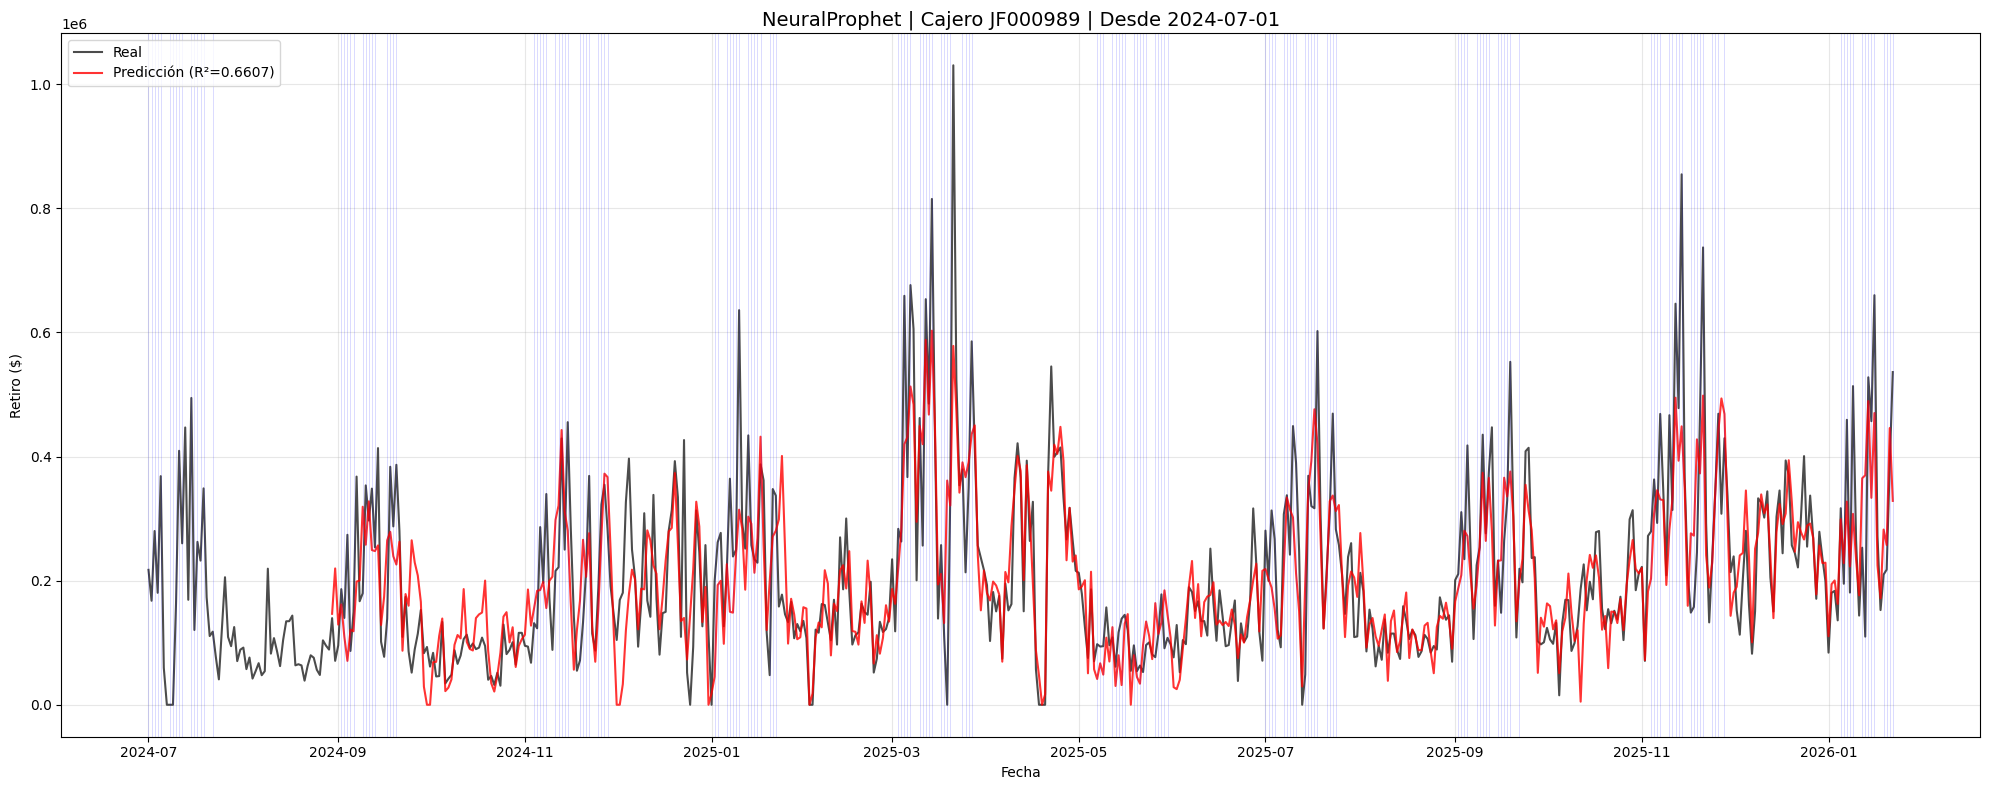


Filas con componentes completos: 511 de 571


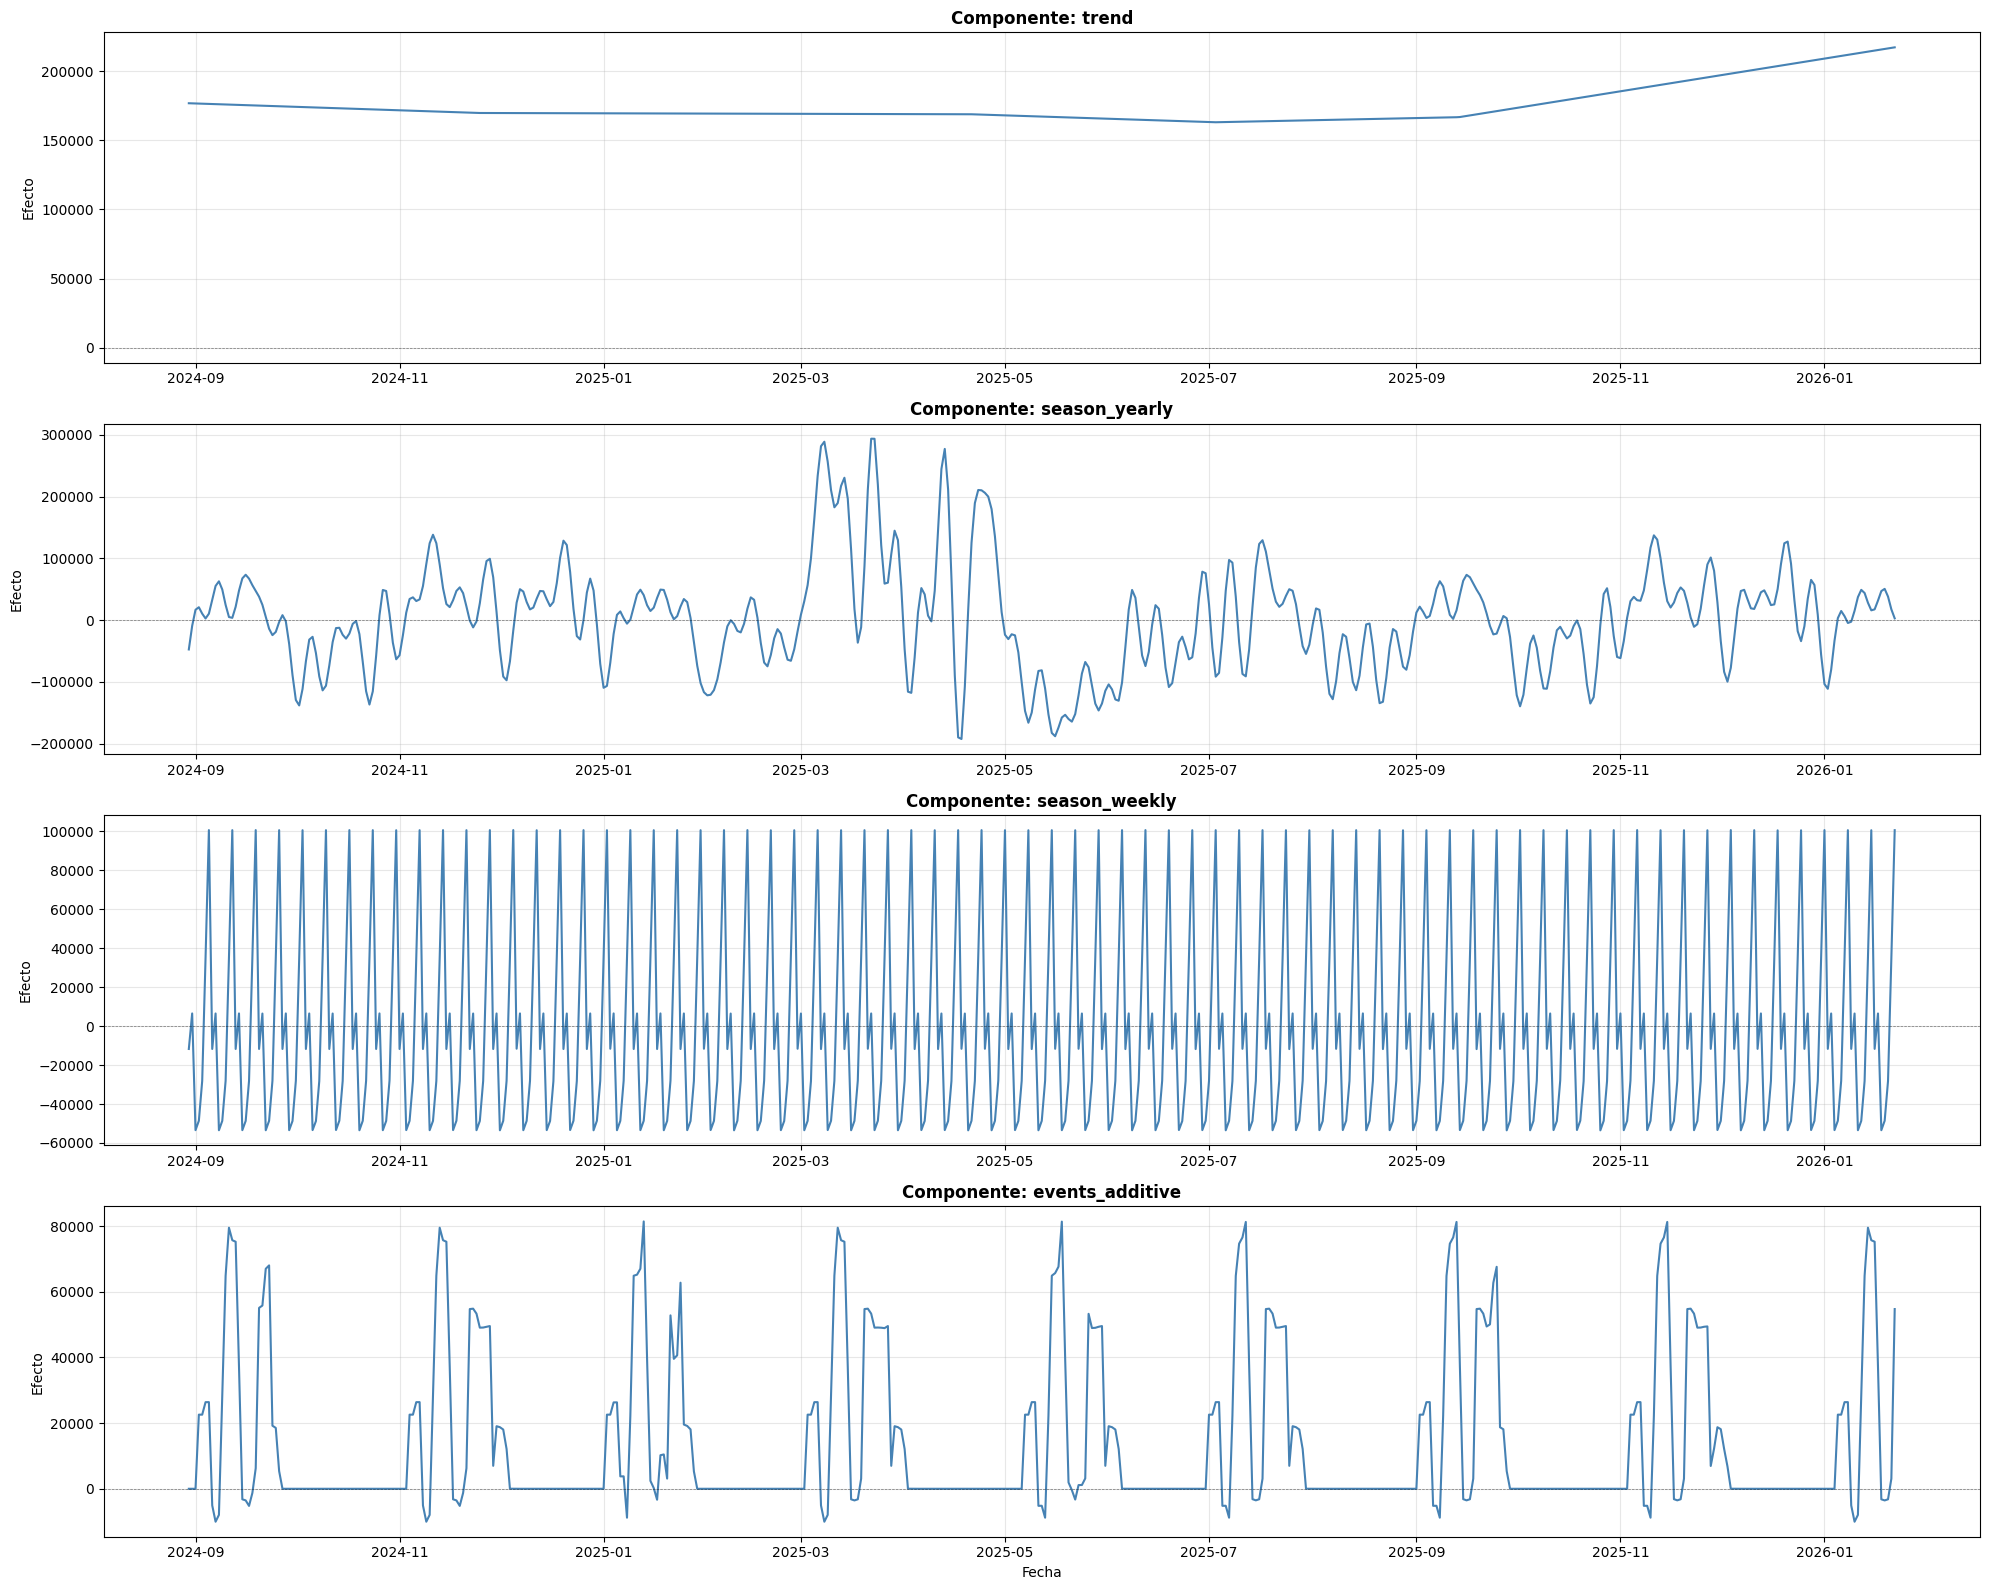

Componentes graficados exitosamente.

COMPARACIÓN:
  Prophet R²:        0.8175
  NeuralProphet R²:  0.6607
  ✗ NO MEJORÓ: -15.68 puntos porcentuales


In [ ]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# ============================================================
# 1. PREPARAR DATOS
# ============================================================
fecha_inicio = '2024-07-01'
cajero_test = 'JF000989'

df_cajero = df[(df['fecha'] >= fecha_inicio) & (df['cajero'] == cajero_test)][['fecha', 'retiro']].copy()
df_cajero.columns = ['ds', 'y']
df_cajero = df_cajero.sort_values('ds').reset_index(drop=True)

print(f"Cajero {cajero_test}: {len(df_cajero)} observaciones desde {fecha_inicio}")
print(f"Rango: {df_cajero['ds'].min()} → {df_cajero['ds'].max()}")

# ============================================================
# 2. CONFIGURAR HOLIDAYS (FECHAS DE DISPERSIÓN)
# ============================================================
holidays_type = 'granular'  # 'agregado' / 'granular'
holidays_usar = holidays_df_granular if holidays_type == 'granular' else holidays_df_agregado

print(f"\nHolidays: {holidays_type}")
print(f"  Eventos únicos: {holidays_usar['holiday'].nunique()}")
print(f"  Total registros: {len(holidays_usar)}")

# Crear columnas binarias por evento
df_cajero_eventos = df_cajero.copy()
for holiday_name in holidays_usar['holiday'].unique():
    fechas_holiday = holidays_usar[holidays_usar['holiday'] == holiday_name]['ds'].values
    df_cajero_eventos[holiday_name] = df_cajero_eventos['ds'].isin(fechas_holiday).astype(int)
    for i in range(1, 4):  # ventana: 3 días después
        df_cajero_eventos.loc[
            df_cajero_eventos['ds'].isin(fechas_holiday + pd.Timedelta(days=i)),
            holiday_name
        ] = 1

# ============================================================
# 3. CONFIGURAR MODELO NEURALPROPHET
# ============================================================
print("\n" + "="*80)
print("CONFIGURANDO MODELO NEURALPROPHET")
print("="*80)

modelo = NeuralProphet(
    # --- TENDENCIA ---
    growth='linear',              # 'linear' | 'discontinuous'
    n_changepoints=6,             # Puntos de cambio en tendencia
    changepoints_range=0.9,       # Rango donde se permiten changepoints (0-1)
    trend_reg=5,                  # Regularización tendencia: alto=suave, bajo=flexible

    # --- COMPONENTE AUTORREGRESIVO ---
    n_lags=60,                    # ⚠️ Bajado de 150 a 60 (tienes ~230 días de datos)
    ar_reg=0.01,                  # Regularización AR: bajo=usa mucho historial

   
    # --- ESTACIONALIDAD ---
    yearly_seasonality=52,        # Términos Fourier anuales
    weekly_seasonality=True,      # Patrón semanal
    daily_seasonality=False,      # Sin patrón intra-día (datos diarios)
    seasonality_mode='additive',  # 'additive' | 'multiplicative'
    seasonality_reg=3,            # Regularización estacionalidad

    # --- PREDICCIÓN ---
    n_forecasts=1,               # Horizonte de predicción (días)

    # --- ENTRENAMIENTO ---
    epochs=150,                   # Subido a 150 para dar más tiempo a la red
    batch_size=32,                # 16=preciso/lento, 32=balanceado, 64=rápido
    learning_rate=0.005,          # Bajado ligeramente para mayor estabilidad con la red

    # --- OTROS ---
    loss_func='Huber',            # 'MSE' | 'Huber' | 'MAE'
    normalize='standardize',      # 'off' | 'minmax' | 'standardize'
    impute_missing=True,
)

print(f"\nParámetros configurados:")
print(f"  --- Tendencia ---")
print(f"  n_changepoints:      6")
print(f"  trend_reg:           5")
print(f"  --- AR ---")
print(f"  n_lags:              60")
print(f"  ar_reg:              0.01")
print(f"  --- Red Neuronal ---")
print(f"  num_hidden_layers:   2")
print(f"  d_hidden:            64")
print(f"  --- Estacionalidad ---")
print(f"  yearly_seasonality:  52")
print(f"  seasonality_reg:     3")
print(f"  seasonality_mode:    additive")
print(f"  --- Entrenamiento ---")
print(f"  epochs:              150")
print(f"  batch_size:          32")
print(f"  learning_rate:       0.005")
print(f"  --- Datos ---")
print(f"  Holidays únicos:     {holidays_usar['holiday'].nunique()}")

# ============================================================
# 4. AGREGAR HOLIDAYS AL MODELO
# ============================================================
print("\nAgregando holidays como eventos...")
for holiday_name in holidays_usar['holiday'].unique():
    modelo = modelo.add_events(
        holiday_name,
        lower_window=0,
        upper_window=3,
        regularization=0.1
    )
print(f"  Eventos agregados: {holidays_usar['holiday'].nunique()}")

# ============================================================
# 5. ENTRENAR MODELO
# ============================================================
print("\nIniciando entrenamiento...")
metrics = modelo.fit(df_cajero_eventos, freq='D', early_stopping=True)
print("Entrenamiento completado.")

# Curva de pérdida
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(metrics['Loss'], label='Train Loss')
if 'Loss_val' in metrics.columns:
    ax.plot(metrics['Loss_val'], label='Val Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Curva de pérdida - Entrenamiento')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# 6. GENERAR PREDICCIONES
# ============================================================
forecast = modelo.predict(df_cajero_eventos)
print("\nColumnas disponibles en forecast:")
print([c for c in forecast.columns.tolist() if not c.startswith('yhat')])

merged = df_cajero.merge(forecast[['ds', 'yhat1']], on='ds').dropna(subset=['yhat1'])

# ============================================================
# 7. EVALUAR DESEMPEÑO
# ============================================================
print("\nAplicando corrección: predicciones negativas → 0")
negativos_antes = (merged['yhat1'] < 0).sum()
merged['yhat1'] = merged['yhat1'].clip(lower=0)
print(f"  Predicciones negativas corregidas: {negativos_antes}")

r2   = r2_score(merged['y'], merged['yhat1'])
mae  = mean_absolute_error(merged['y'], merged['yhat1'])
rmse = np.sqrt(((merged['yhat1'] - merged['y'])**2).mean())

print(f"\n{'='*80}")
print("RESULTADOS:")
print(f"  R²:   {r2:.4f}  → % varianza explicada")
print(f"  MAE:  ${mae:,.0f}  → Error promedio")
print(f"  RMSE: ${rmse:,.0f}  → Penaliza errores grandes")
print("="*80)

# ============================================================
# 8. GRAFICAR AJUSTE
# ============================================================
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(df_cajero['ds'], df_cajero['y'],
        label='Real', color='black', linewidth=1.5, alpha=0.7)
ax.plot(merged['ds'], merged['yhat1'],
        label=f'Predicción (R²={r2:.4f})', color='red', linewidth=1.5, alpha=0.8)

for fecha in holidays_usar['ds'].unique():
    if df_cajero['ds'].min() <= fecha <= df_cajero['ds'].max():
        ax.axvline(fecha, color='blue', alpha=0.2, linewidth=0.5)

ax.set_title(f'NeuralProphet | Cajero {cajero_test} | Desde {fecha_inicio}', fontsize=14)
ax.set_xlabel('Fecha')
ax.set_ylabel('Retiro ($)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# 9. GRAFICAR COMPONENTES
# ============================================================
# Verificar nombres reales de columnas antes de graficar
componentes_candidatos = ['trend', 'season_yearly', 'season_weekly', 'events_additive',
                          'seasonality_yearly', 'seasonality_weekly']  # nombres alternativos por versión
componentes_a_graficar = [c for c in componentes_candidatos if c in forecast.columns]

if holidays_type == 'agregado':
    extras = ['event_adultos_mayores', 'event_discapacidad', 'event_madres_trabajadoras']
    componentes_a_graficar += [c for c in extras if c in forecast.columns]

forecast_limpio = forecast.dropna(subset=componentes_a_graficar)
print(f"\nFilas con componentes completos: {len(forecast_limpio)} de {len(forecast)}")

if len(forecast_limpio) > 0:
    fig, axes = plt.subplots(len(componentes_a_graficar), 1,
                             figsize=(20, 4 * len(componentes_a_graficar)))
    if len(componentes_a_graficar) == 1:
        axes = [axes]

    for idx, componente in enumerate(componentes_a_graficar):
        axes[idx].plot(forecast_limpio['ds'], forecast_limpio[componente],
                       linewidth=1.5, color='steelblue')
        axes[idx].set_title(f'Componente: {componente}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel('Efecto')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].axhline(0, color='black', linestyle='--', linewidth=0.5, alpha=0.5)

    axes[-1].set_xlabel('Fecha')
    plt.tight_layout()
    plt.show()
    print("Componentes graficados exitosamente.")
else:
    print("⚠️ No hay suficientes datos sin NaN para graficar componentes.")
    print("Puede pasar si n_lags es muy grande vs el tamaño del dataset.")

# ============================================================
# 10. COMPARACIÓN PROPHET vs NEURALPROPHET
# ============================================================
print("\n" + "="*80)
print("COMPARACIÓN:")
print(f"  Prophet R²:        0.8175")
print(f"  NeuralProphet R²:  {r2:.4f}")
if r2 > 0.8175:
    print(f"  ✓ MEJORA: +{(r2 - 0.8175)*100:.2f} puntos porcentuales")
else:
    print(f"  ✗ NO MEJORÓ: {(r2 - 0.8175)*100:.2f} puntos porcentuales")
print("="*80)